# Multi-Modal Data Fusion - Project Work: Multi-Modal Physical Exercise Classification


In this project, real multi-modal data is studied by utilizing different techniques presented during the course. In addition, there is an optional task to try some different approaches to identify persons from the same dataset. Open MEx dataset from UCI machine learning repository is used. Idea is to apply different techniques to recognize physical exercises from wearable sensors and depth camera, user-independently.

## Author(s)
Add your information here

Name(s): Sasini Mahadura, Kalpani Kammangoda Mudalige 

Student number(s):  

## Description 

The goal of this project is to develop user-independent pre-processing and classification models to recognize 7 different physical exercises measured by accelerometer (attached to subject's thigh) and depth camera (above the subject facing downwards recording an aerial view). All the exercises were performed subject lying down on the mat. Original dataset have also another acceleration sensor and pressure-sensitive mat, but those two modalities are ommited in this project. There are totally 30 subjects in the original dataset, and in this work subset of 10 person is utilized. Detailed description of the dataset and original data can be access in [MEx dataset @ UCI machine learning repository](https://archive.ics.uci.edu/ml/datasets/MEx#). We are providing the subset of dataset in Moodle.

The project work is divided on following phases:

1. Data preparation, exploration, and visualization
2. Feature extraction and unimodal fusion for classification
3. Feature extraction and feature-level fusion for multimodal classification
4. Decision-level fusion for multimodal classification
5. Bonus task: Multimodal biometric identification of persons

where 1-4 are compulsory (max. 10 points each), and 5 is optional to get bonus points (max. 5+5 points). In each phase, you should visualize and analyse the results and document the work and findings properly by text blocks and figures between the code. <b> Nice looking </b> and <b> informative </b> notebook representing your results and analysis will be part of the grading in addition to actual implementation.

The results are validated using confusion matrices and F1 scores. F1 macro score is given as 
<br>
<br>
$
\begin{equation}
F1_{macro} = \frac{1}{N} \sum_i^N F1_i,
\end{equation}
$
<br>
<br>
where $F1_i = 2  \frac{precision_i * recall_i}{precision_i + recall_i}$, and $N$ is the number of classes.
<br>

## Learning goals 

After the project work, you should  

- be able to study real world multi-modal data
- be able to apply different data fusion techniques to real-world problem
- be able to evaluate the results
- be able to analyse the outcome
- be able to document your work properly

## Relevant lectures

Lectures 1-8

## Relevant exercises

Exercises 0-6

## Relevant chapters in course book

Chapter 1-14

## Additional Material 

* Original dataset [MEx dataset @ UCI machine learning repository](https://archive.ics.uci.edu/ml/datasets/MEx#)
* Related scientific article [MEx: Multi-modal Exercises Dataset for Human Activity Recognition](https://arxiv.org/pdf/1908.08992.pdf)

# 1. Data preparation, exploration, and visualization

<a id='task1'></a>
<div class=" alert alert-warning">
    <b>Assigment.</b> <b>Task 1.</b>

Download data from the Moodle's Project section. Get yourself familiar with the folder structure and data. You can read the data files using the function given below. Each file consists one exercise type performed by single user. Data are divided on multiple folders. Note that, in each folder there is one long sequence of single exercise, except exercise 4 which is performed two times in different ways. Those two sequences belongs to same class. Do the following subtasks to pre-analyse data examples and to prepare the training and testing data for next tasks:
<br>
<br> 
<p> Read raw data from the files. Prepare and divide each data file to shorter sequences using windowing method. Similar to related article "MEx: Multi-modal Exercises Dataset for Human Activity Recognition", use 5 second window and 3 second overlapping between windows, producing several example sequences from one exercise file for classification purposes. Windowing is working so that starting from the beginning of each long exercise sequence, take 5 seconds of data points (from synchronized acceleration data and depth images) based on the time stamps. Next, move the window 2 seconds forward and take another 5 seconds of data. Then continue this until your are at the end of sequence. Each window will consists 500x3 matrix of acceleration data and 5x192 matrix of depth image data.</p>
<br>  
<p> <b>1.1</b> Plot few examples of prepared data for each modalities (accelometer and depth camera). Plot acceleration sensor as multi-dimensional time-series and depth camera data as 2D image. Plot 5 second acceleration sensor and depth image sequences of person 1 and 5 performing exercises 2, 5, and 6. Take the first windowed example from the long exercise sequence. </p>
<br>
<p> <b>1.2</b> Split the prepared dataset to training and testing datasets so that data of persons 1-7 are used for training and data of persons 8-10 are used for testing. In next tasks, training dataset could be further divided on (multiple) validation data folds to tune the models parameters, when needed.<br>
    
<p> Note: Training set should have 1486 windows and testing set should have 598 windows. In training set, acceleration data will have a window without a pair with depth camera data, that window should be dropped as it doesn't have a pair.<p>
    
    
    
    
Document your work, calculate the indicator statistics of training and testing datasets (number of examples, dimensions of each example) and visualize prepared examples.

</div>

In [1]:
# Import relevant libraries here
from pathlib import Path
from copy import deepcopy
import numpy as np
import pandas as pd
from tabulate import tabulate

# Enter data folder location
loc = "./MEx"

In [2]:
def path_to_meta(p):
    meta = dict()
    meta["subject_id"] = p.parent.stem
    meta["exercise_id"] = p.stem.split("_")[-2]
    meta["trial"] = int(p.stem.split("_")[-1])
    meta["sensor_code"] = p.stem.split("_")[0]
    meta["sensor"] = {"act": "acc", "dc": "dc"}[meta["sensor_code"]]
    return meta

# Find, read, and compose the measurements
paths_record = Path(loc).glob("*/*/*.csv")

records = []

for path_record in paths_record:
    df = pd.read_csv(path_record, delimiter=",", header=None)
    meta = path_to_meta(path_record)
    
    if meta["sensor"] == "acc":
        col_names = ["time", "acc_0", "acc_1", "acc_2"]
        df.columns = col_names
    else:
        num_cols = df.shape[1]
        col_names = ["time", ] + [f"dc_{i}" for i in range(num_cols-1)]
        df.columns = col_names

    meta["df"] = df
    
    records.append(meta)

df_records = pd.DataFrame.from_records(records)

print(f"Total records found: {len(df_records)}")
print("Dataframe with all records:")
display(df_records.head())
df_records.to_csv('out.csv')
print("Dataframe with one measurement series:")
display(df_records["df"].iloc[0].head())

Total records found: 160
Dataframe with all records:


,subject_id,exercise_id,trial,sensor_code,sensor,df
0,01,01,1,act,acc,time acc_0 acc_1 acc_2 0 ...
1,01,02,1,act,acc,time acc_0 acc_1 acc_2 0 ...
2,01,03,1,act,acc,time acc_0 acc_1 acc_2 0 ...
3,01,04,1,act,acc,time acc_0 acc_1 acc_2 0 ...
4,01,04,2,act,acc,time acc_0 acc_1 acc_2 0 ...


Dataframe with one measurement series:


,time,acc_0,acc_1,acc_2
0,0.0,-0.515625,-0.843750,-0.131944
1,10.0,-0.515625,-0.853125,-0.134375
2,20.0,-0.515625,-0.850000,-0.140625
3,30.0,-0.515625,-0.862500,-0.150000
4,40.0,-0.525000,-0.856250,-0.156250


In [3]:
# Extract 5-second long windows with 2-second shift (3-second overlap)

records_windowed = []

time_window = 5000.
time_offset = 2000.
    
for row_idx, row_data in df_records.iterrows():
    df_tmp = row_data["df"]
    time_start = np.min(df_tmp["time"].to_numpy())
    time_end = np.max(df_tmp["time"].to_numpy())
    
    for window_idx, t0 in enumerate(np.arange(time_start, time_end, time_offset)):
        t1 = t0 + time_window
        # Handle boundary conditions - skip the measurements from the end shorter than window size
        if t1 > time_end:
            continue
        
        tmp_data = deepcopy(row_data)
        tmp_data["window_idx"] = window_idx
        tmp_data["df"] = df_tmp[(df_tmp["time"] >= t0) &
                                (df_tmp["time"] < t1)].copy()
        
        records_windowed.append(tmp_data)
        
df_records_windowed = pd.DataFrame.from_records(records_windowed)

print(f"Total windows extracted: {len(df_records_windowed)}")
print("Dataframe with all windowed records:")
display(df_records_windowed.head())
df_records_windowed.to_csv('out3.csv')
print("Dataframe with one windowed measurement series:")
display(df_records_windowed["df"].iloc[0].head())
y=df_records_windowed["df"].iloc[0]
y.to_csv('out4.csv')

Total windows extracted: 4169
Dataframe with all windowed records:


,subject_id,exercise_id,trial,sensor_code,sensor,df,window_idx
0,01,01,1,act,acc,time acc_0 acc_1 acc_2 0 ...,0
1,01,01,1,act,acc,time acc_0 acc_1 acc_2 200 ...,1
2,01,01,1,act,acc,time acc_0 acc_1 acc_2 400 ...,2
3,01,01,1,act,acc,time acc_0 acc_1 acc_2 60...,3
4,01,01,1,act,acc,time acc_0 acc_1 acc_2 80...,4


Dataframe with one windowed measurement series:


,time,acc_0,acc_1,acc_2
0,0.0,-0.515625,-0.843750,-0.131944
1,10.0,-0.515625,-0.853125,-0.134375
2,20.0,-0.515625,-0.850000,-0.140625
3,30.0,-0.515625,-0.862500,-0.150000
4,40.0,-0.525000,-0.856250,-0.156250


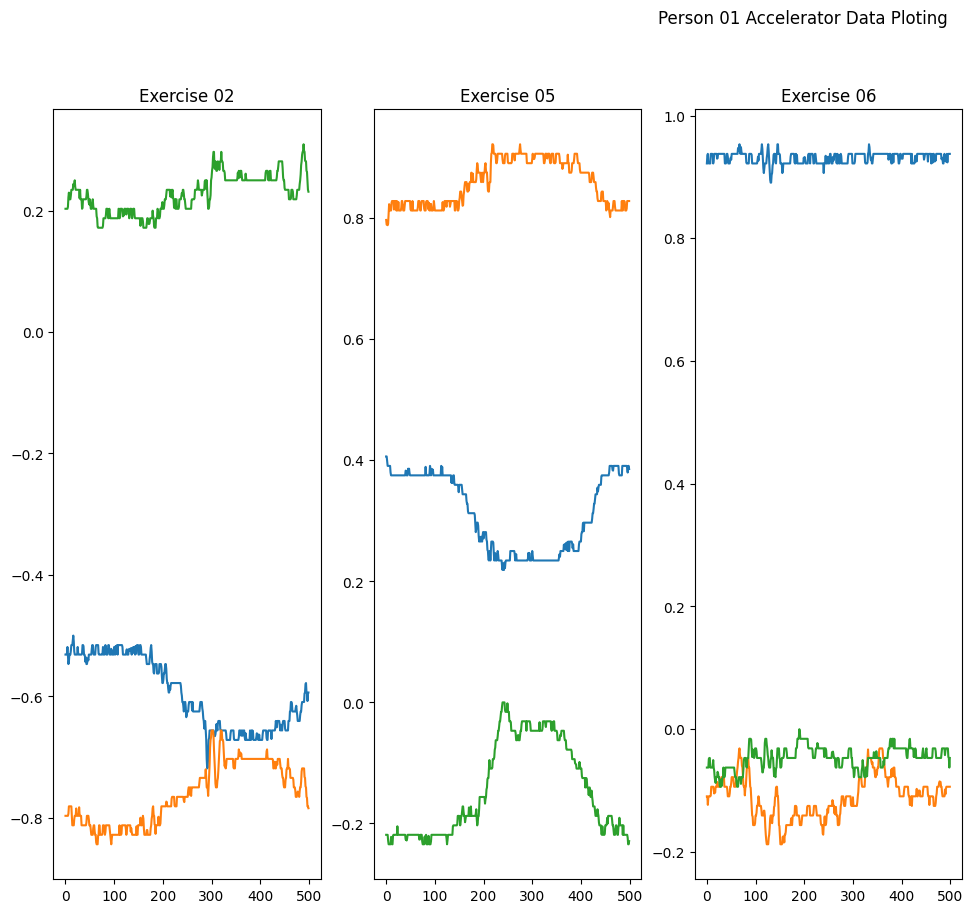

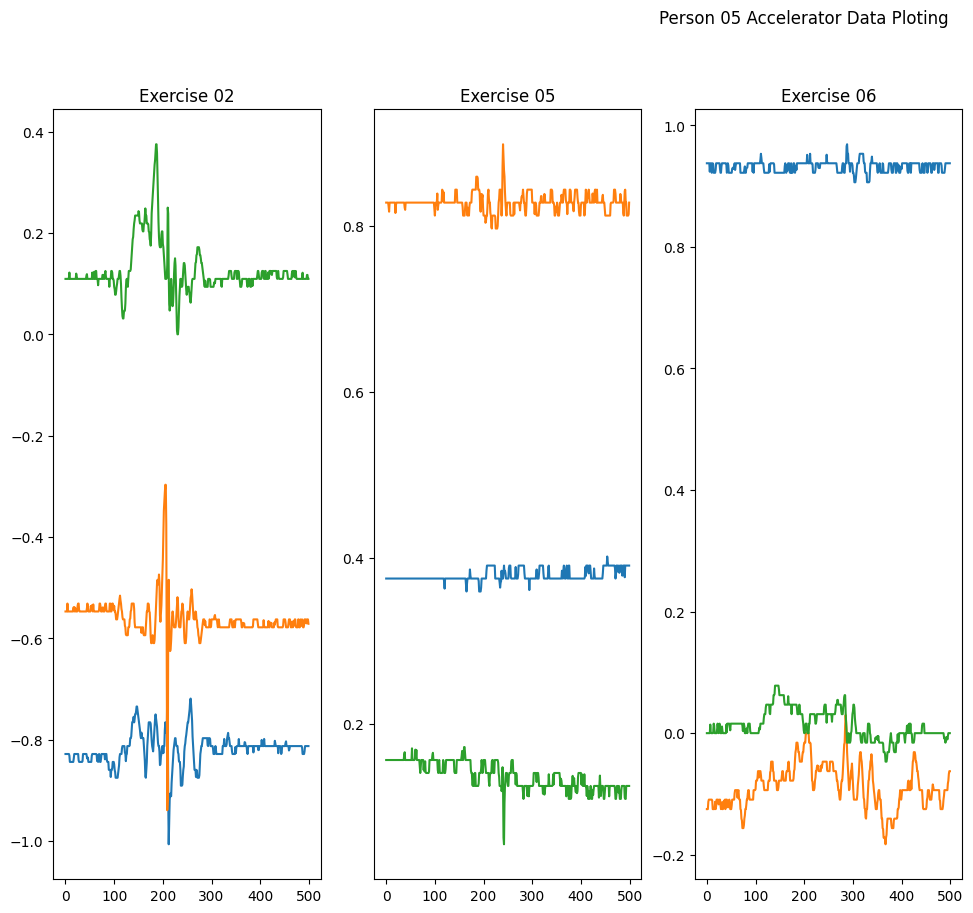

<Figure size 2000x1000 with 0 Axes>

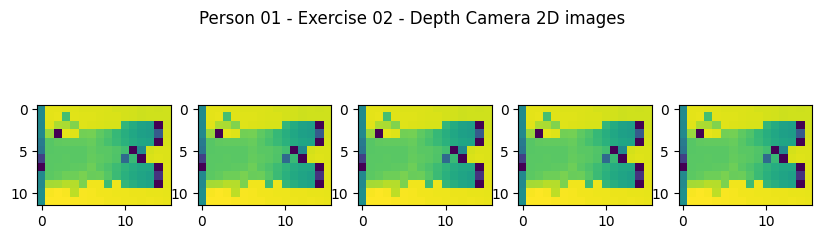

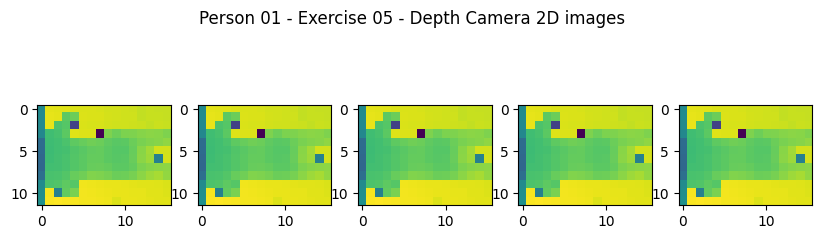

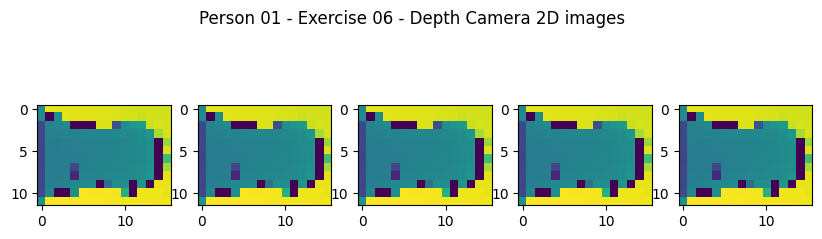

<Figure size 2000x1000 with 0 Axes>

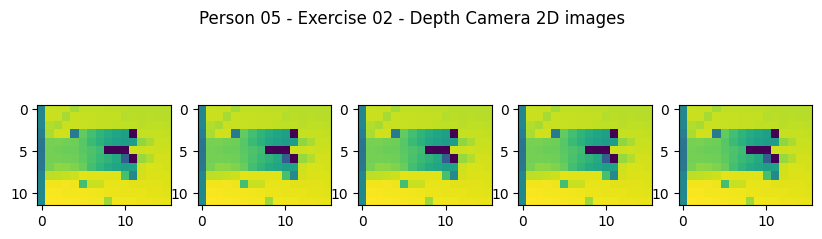

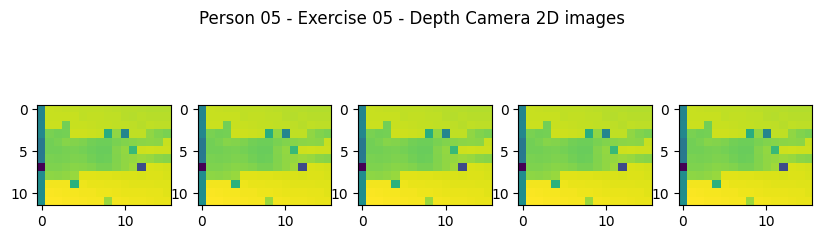

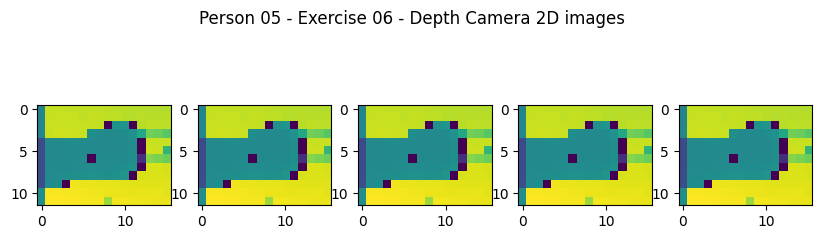

In [4]:
# 1.1. Visualize selected samples for both modalities

### Your code begins here ###
from matplotlib import pyplot as plt


def PlotDataForModalities(df_records_windowed, person_id, modality):
    exercise_ids =['02','05','06']
    fig_acc = plt.figure(figsize=(20,10)) 
    for i in range(0,len(exercise_ids)):
        selected_records = df_records_windowed[(df_records_windowed['sensor_code'] == modality)
                                              & (df_records_windowed['subject_id'] == person_id)
                                              & (df_records_windowed['exercise_id'] ==exercise_ids[i])]
        selected_records_df = selected_records["df"].iloc[0]
        data_to_display = selected_records_df.drop(['time'], axis=1)
        
        
        if(modality == 'act'):
            fig_acc.suptitle('Person ' + person_id + ' Accelerator Data Ploting')
            fig_acc.add_subplot(1,5,i+1)
            plt.plot(data_to_display)
            plt.title("Exercise " + exercise_ids[i])
        
        else:
            #display(selected_records_df.head())
            fig_dc = plt.figure(figsize=(10,3))
            fig_dc.suptitle('Person ' + person_id +" - Exercise " + exercise_ids[i]+ " - Depth Camera 2D images")
            dc_img_1 = data_to_display.iloc[0].to_numpy().reshape(12,16)
            fig_dc.add_subplot(1,5,1)
            plt.imshow(dc_img_1, interpolation='nearest')
            
            dc_img_2 = data_to_display.iloc[1].to_numpy().reshape(12,16)
            fig_dc.add_subplot(1,5,2)
            plt.imshow(dc_img_1, interpolation='nearest')
            
            dc_img_3 = data_to_display.iloc[2].to_numpy().reshape(12,16)
            fig_dc.add_subplot(1,5,3)
            plt.imshow(dc_img_1, interpolation='nearest')
            
            dc_img_4 = data_to_display.iloc[3].to_numpy().reshape(12,16)
            fig_dc.add_subplot(1,5,4)
            plt.imshow(dc_img_1, interpolation='nearest')
            
            dc_img_5 = data_to_display.iloc[4].to_numpy().reshape(12,16)
            fig_dc.add_subplot(1,5,5)
            plt.imshow(dc_img_1, interpolation='nearest')
            


PlotDataForModalities(df_records_windowed, '01', 'act')
PlotDataForModalities(df_records_windowed, '05', 'act')
PlotDataForModalities(df_records_windowed, '01', 'dc')
PlotDataForModalities(df_records_windowed, '05', 'dc')
### Your code ends here ###

In [5]:
# 1.2. Split samples based on subject ID into training and testing datasets for futher experiments


### Your code begins here ###
df_for_data_splitting = df_records_windowed.copy()
df_for_data_splitting['subject_id'] = pd.to_numeric(df_for_data_splitting['subject_id'])
df_for_data_splitting['exercise_id'] = pd.to_numeric(df_for_data_splitting['exercise_id'])

training_df = df_for_data_splitting[df_for_data_splitting['subject_id'] <=7]
testing_df = df_for_data_splitting[df_for_data_splitting['subject_id'] > 7]

#print(training_df.shape[0])
#print(testing_df.shape[0])

def MergeDataByPairs(df):
    df_accelaration = df[df['sensor_code'] == 'act']
    df_depth_camera = df[df['sensor_code'] == 'dc']
    
    df_accelaration = df_accelaration.drop(['sensor_code','sensor'], axis=1)
    df_depth_camera = df_depth_camera.drop(['sensor_code','sensor'], axis=1)
    
    paired_df = pd.merge(df_accelaration, df_depth_camera,  how='right', left_on=['subject_id','trial', 'window_idx', 'exercise_id'],
                      right_on = ['subject_id','trial', 'window_idx', 'exercise_id'])
    paired_df = paired_df.rename(columns={"df_x": "df_acceleration", "df_y": "df_depth_camera"})
    return paired_df

train_paired_df = MergeDataByPairs(training_df)
test_paired_df  = MergeDataByPairs(testing_df)

#print(train_paired_df.shape[0])
#print(test_paired_df.shape[0])

display(train_paired_df.head())

#number of examples, dimensions of each example
table = [['Data Set', 'Data Rows', 'Data Columns',  'Shape of Data Set'], 
         ['Training Data Set',len(train_paired_df), len(train_paired_df.columns), train_paired_df.shape],
         ['Testing Data Set',len(test_paired_df), len(test_paired_df.columns), test_paired_df.shape]
        ]

print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))
print("Column names for both sets - " + ', '.join(list(train_paired_df.columns)))
### Your code ends here ###

,subject_id,exercise_id,trial,df_acceleration,window_idx,df_depth_camera
0,1,1,1,time acc_0 acc_1 acc_2 0 ...,0,time dc_0 dc_1 dc_2 dc_3 d...
1,1,1,1,time acc_0 acc_1 acc_2 200 ...,1,time dc_0 dc_1 dc_2 dc_3 d...
2,1,1,1,time acc_0 acc_1 acc_2 400 ...,2,time dc_0 dc_1 dc_2 dc_3 d...
3,1,1,1,time acc_0 acc_1 acc_2 60...,3,time dc_0 dc_1 dc_2 dc_3 ...
4,1,1,1,time acc_0 acc_1 acc_2 80...,4,time dc_0 dc_1 dc_2 dc_3 ...


╒═══════════════════╤═════════════╤════════════════╤═════════════════════╕
│ Data Set          │   Data Rows │   Data Columns │ Shape of Data Set   │
╞═══════════════════╪═════════════╪════════════════╪═════════════════════╡
│ Training Data Set │        1486 │              6 │ (1486, 6)           │
├───────────────────┼─────────────┼────────────────┼─────────────────────┤
│ Testing Data Set  │         598 │              6 │ (598, 6)            │
╘═══════════════════╧═════════════╧════════════════╧═════════════════════╛
Column names for both sets - subject_id, exercise_id, trial, df_acceleration, window_idx, df_depth_camera


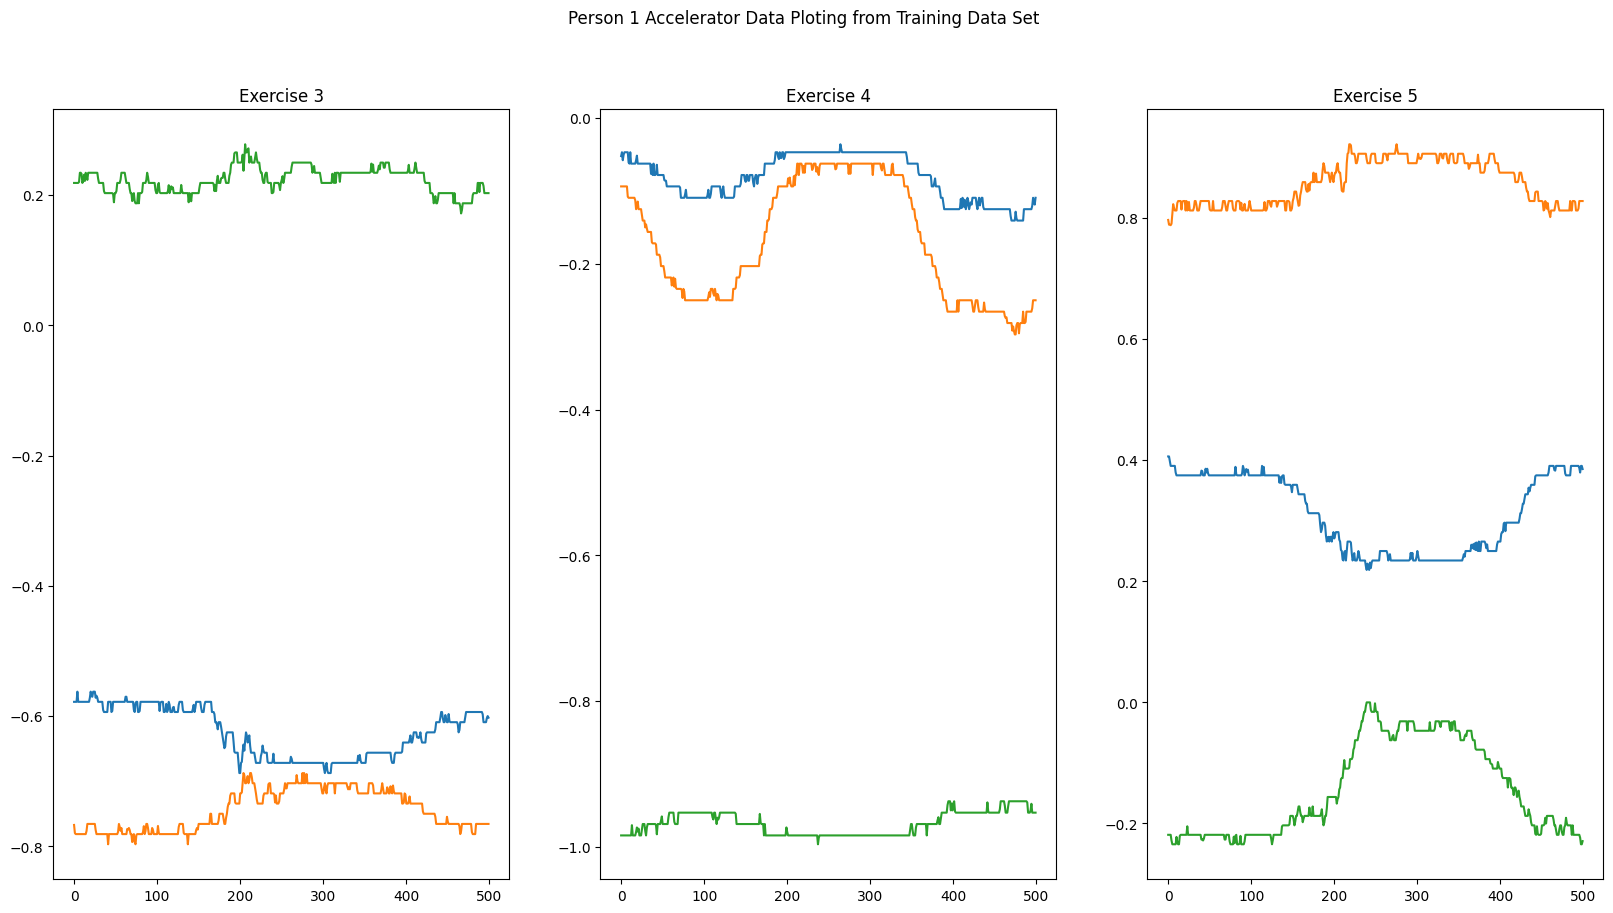

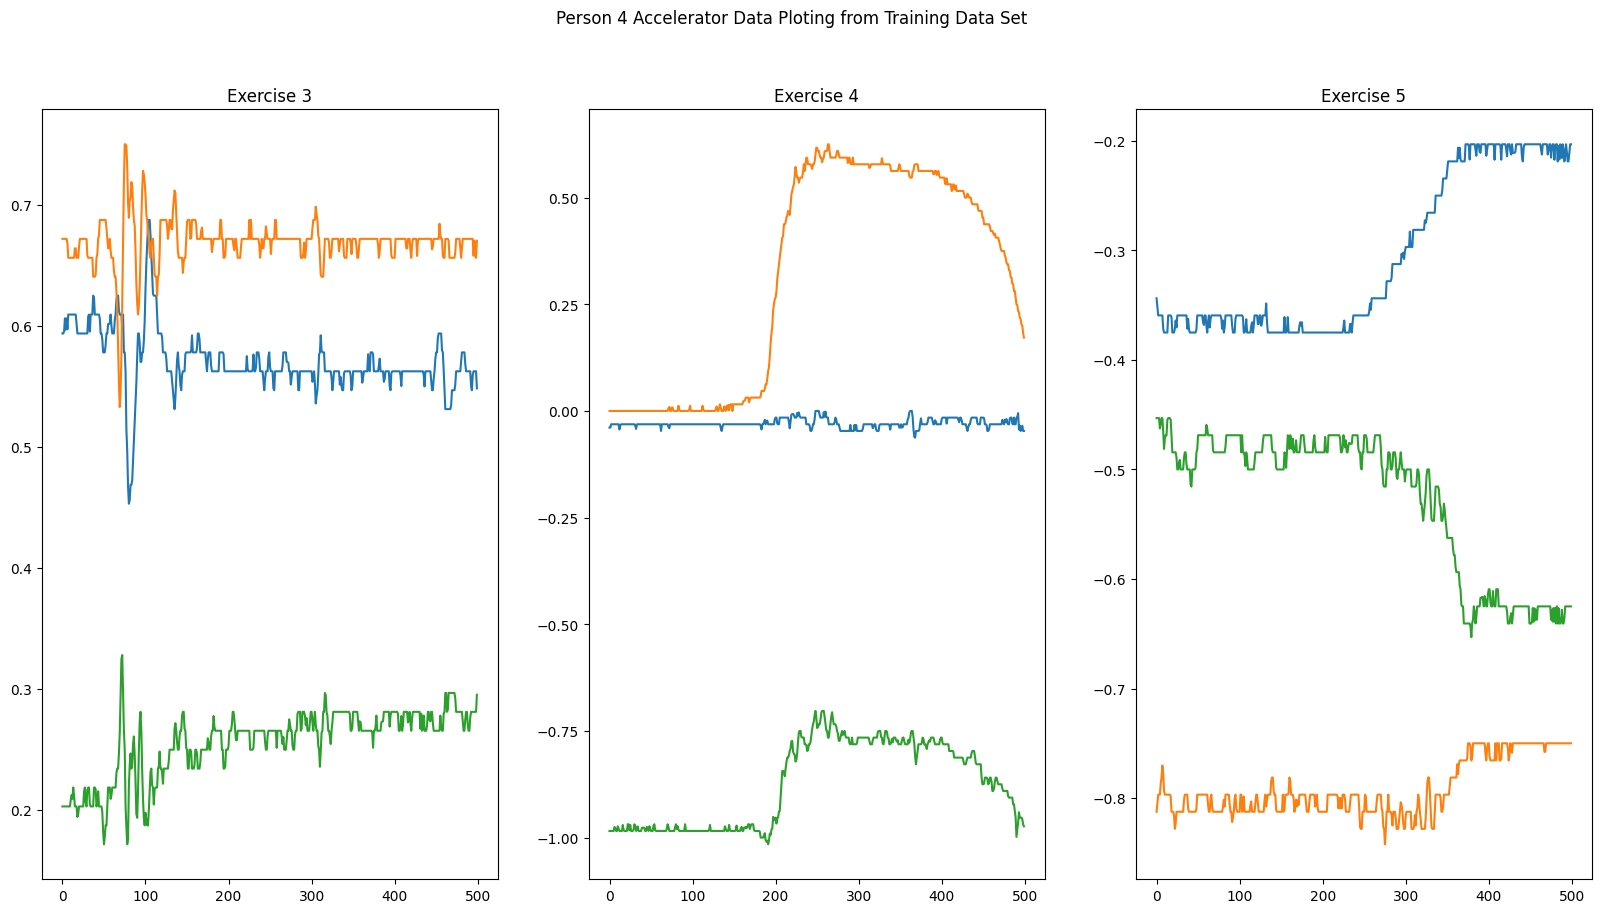

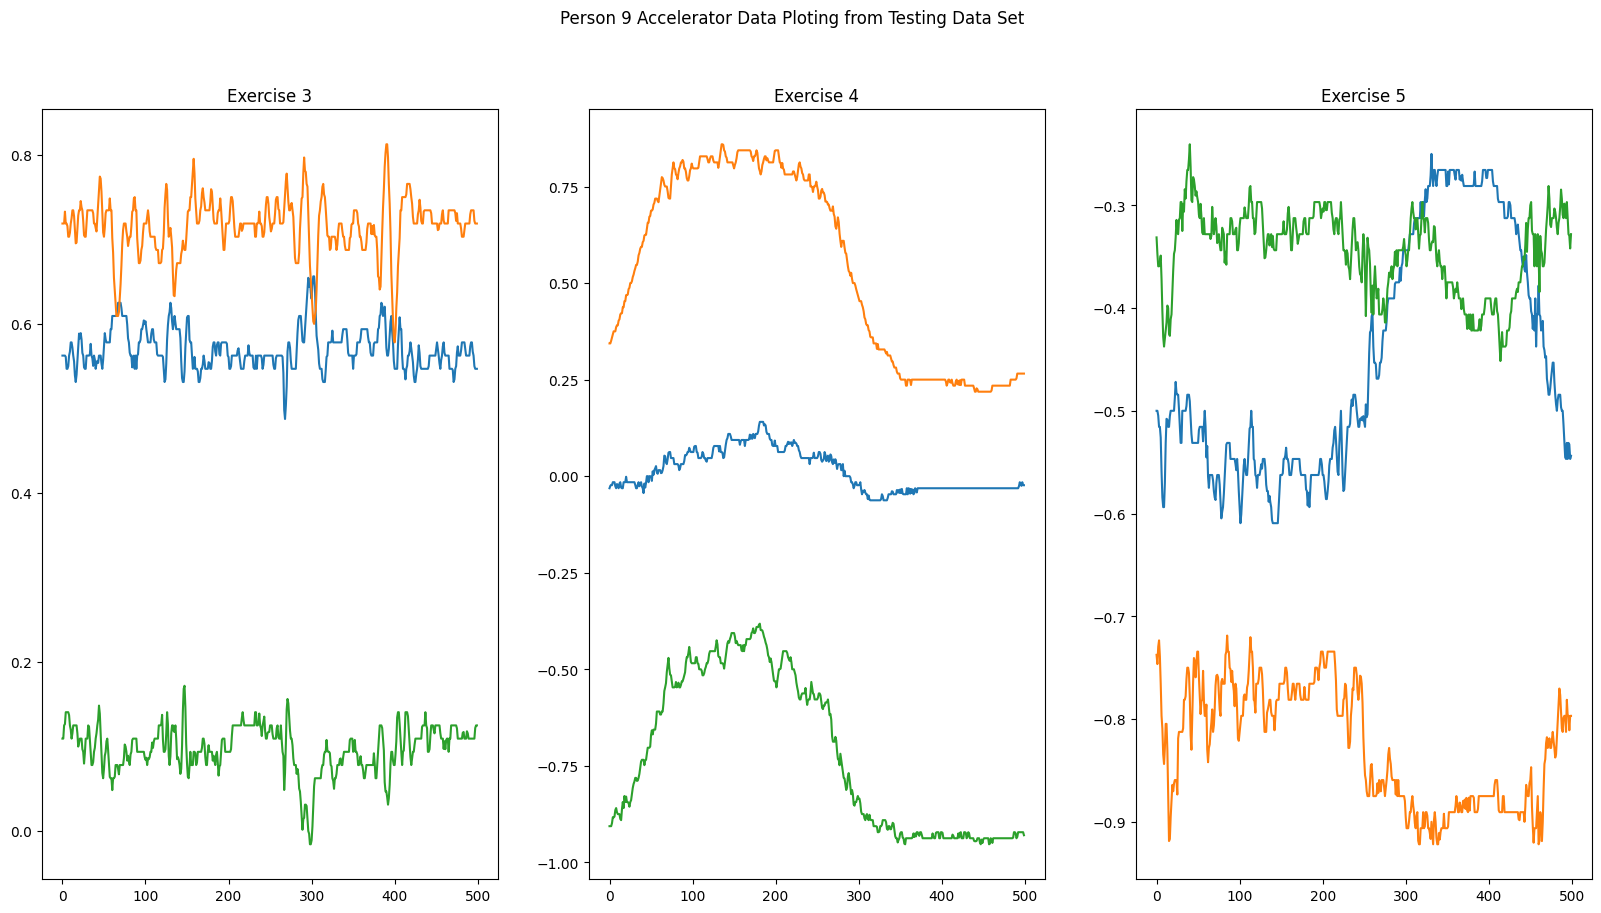

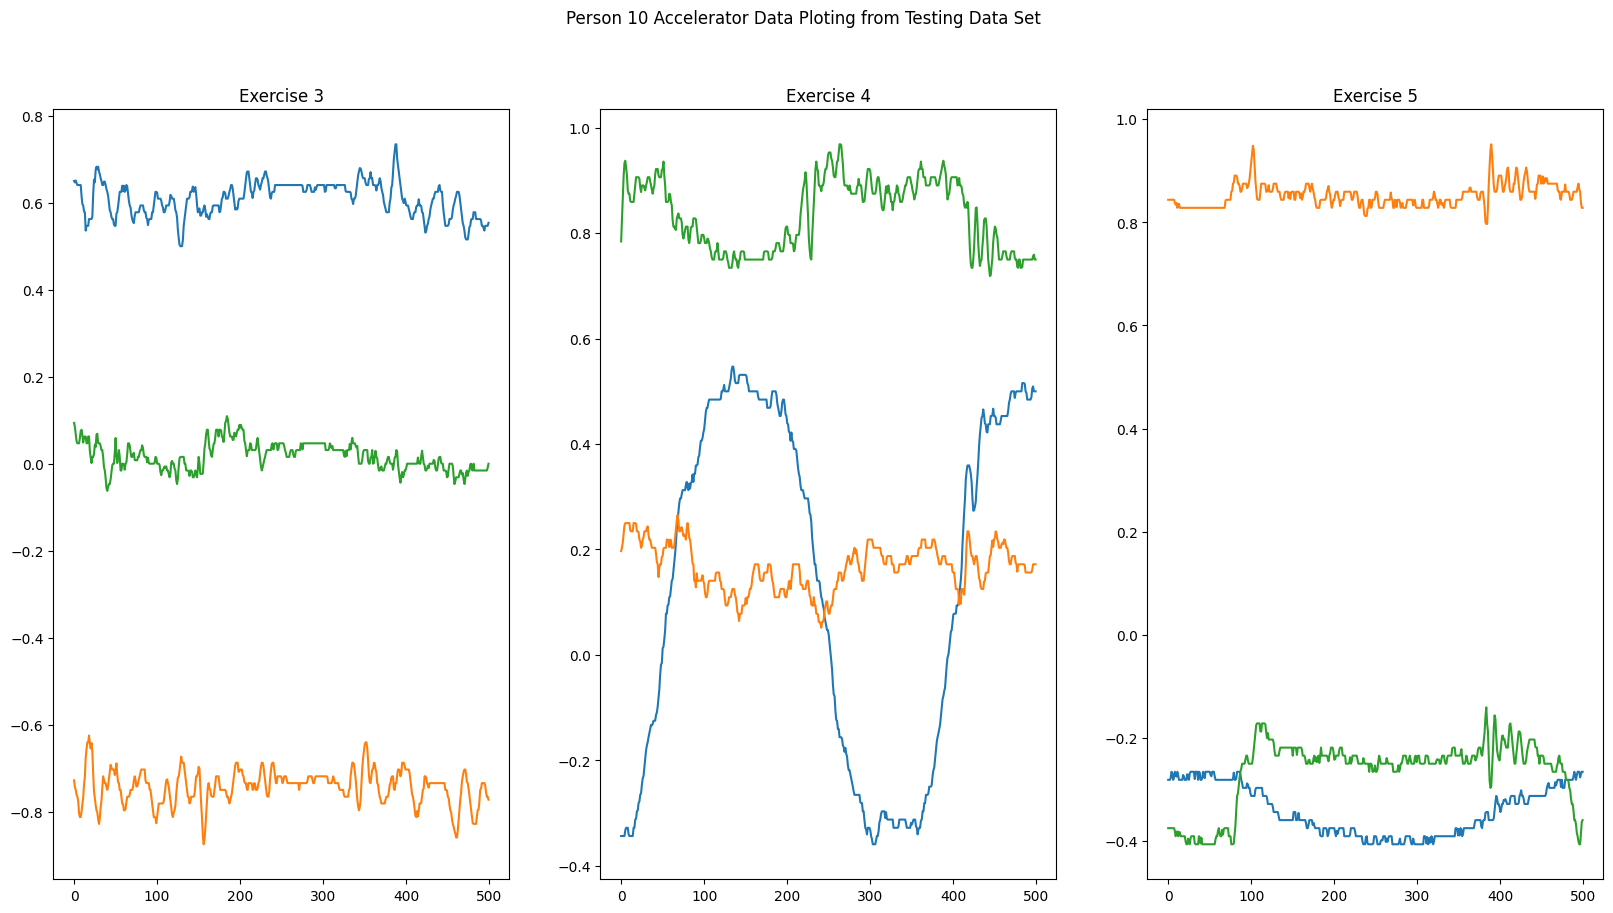

In [6]:
#Visualizing Person 1 and 4 doing exercise 3,4,5 acceleration data from training data set
#Visualizing Person 9 and 10 doing exercise 3,4,5 acceleration data from testing data set

def PlotAccelerateData(df, person_id, dataSet):
    exercise_ids =[3,4,5]
    fig_acc = plt.figure(figsize=(20,10)) 
    for i in range(0,len(exercise_ids)):
        selected_records = df[(df['subject_id'] == person_id)
                                              & (df['exercise_id'] ==exercise_ids[i])]
        selected_records_df = selected_records['df_acceleration'].iloc[0]
        data_to_display = selected_records_df.drop(['time'], axis=1)
        fig_acc.suptitle('Person ' + str(person_id) + ' Accelerator Data Ploting from '+ dataSet)
        fig_acc.add_subplot(1,3,i+1)
        plt.plot(data_to_display)
        plt.title("Exercise " + str(exercise_ids[i]))
PlotAccelerateData(train_paired_df,1,'Training Data Set')
PlotAccelerateData(train_paired_df,4, 'Training Data Set')
PlotAccelerateData(test_paired_df,9, 'Testing Data Set')
PlotAccelerateData(test_paired_df,10, 'Testing Data Set')

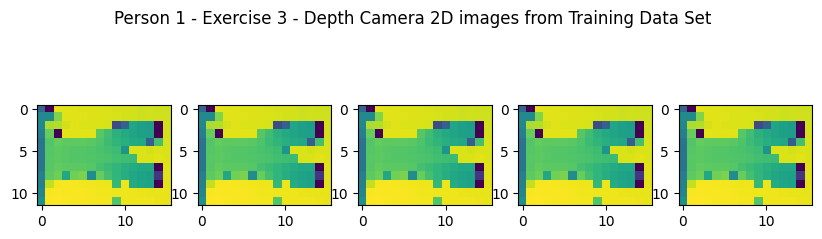

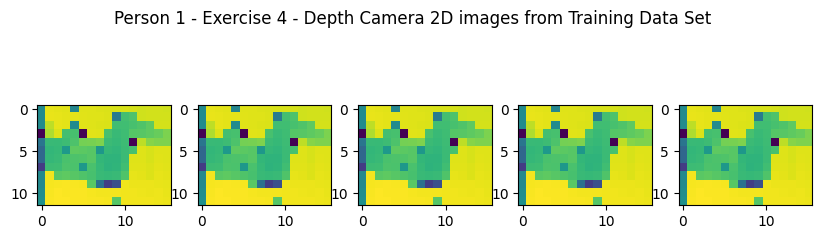

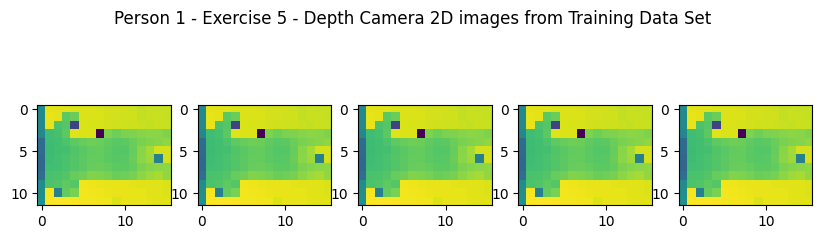

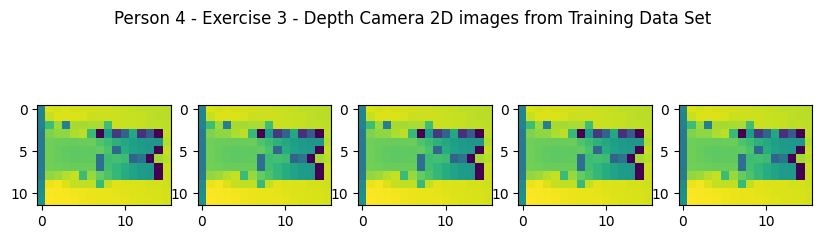

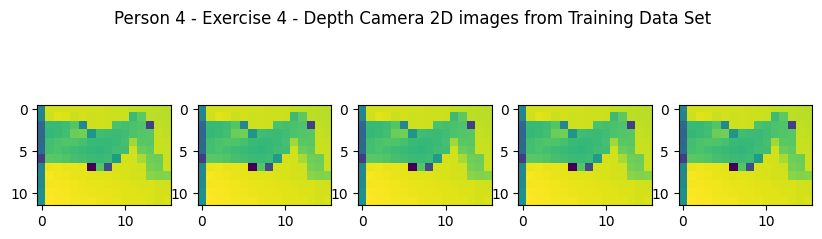

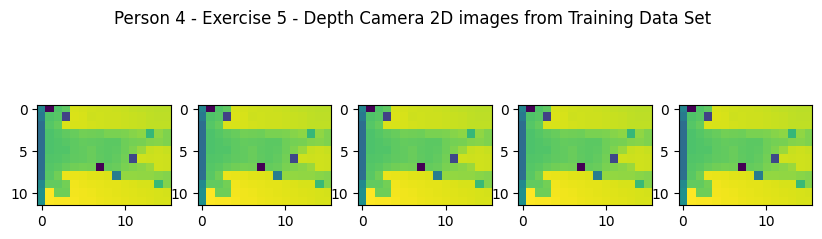

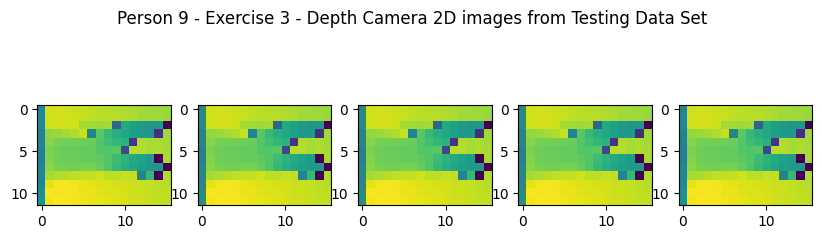

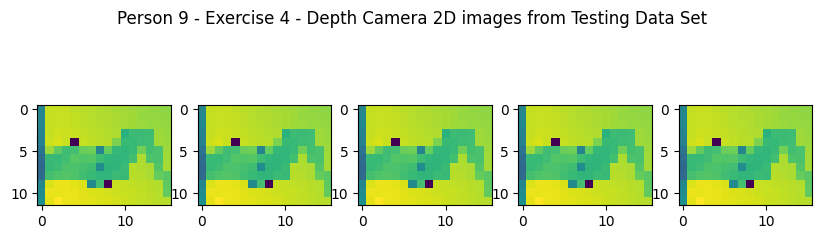

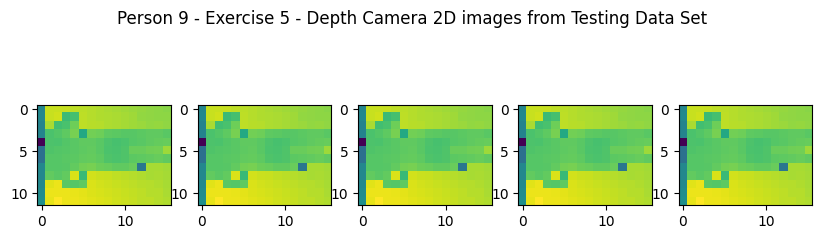

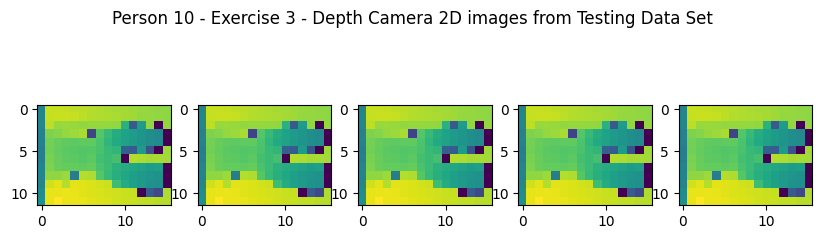

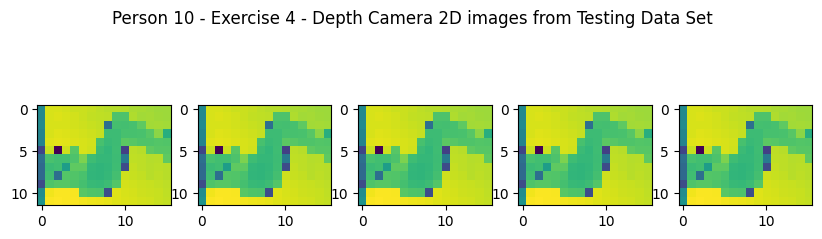

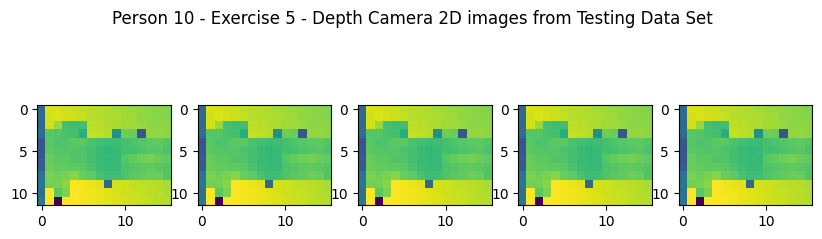

In [7]:
#Visualizing Person 1 and 4 doing exercise 3,4,5 depth camera data from training data set
#Visualizing Person 9 and 10 doing exercise 3,4,5 depth camera data from testing data set


def PlotDepthCameraData(df, person_id, dataSet):
    exercise_ids =[3,4,5]
    for i in range(0,len(exercise_ids)):
        selected_records = df[(df['subject_id'] == person_id)
                                              & (df['exercise_id'] ==exercise_ids[i])]
        selected_records_df = selected_records['df_depth_camera'].iloc[0]
        data_to_display = selected_records_df.drop(['time'], axis=1)
        fig_dc = plt.figure(figsize=(10,3))
        fig_dc.suptitle('Person ' + str(person_id) +" - Exercise " + str(exercise_ids[i])+ " - Depth Camera 2D images from "+dataSet)
        dc_img_1 = data_to_display.iloc[0].to_numpy().reshape(12,16)
        fig_dc.add_subplot(1,5,1)
        plt.imshow(dc_img_1, interpolation='nearest')
            
        dc_img_2 = data_to_display.iloc[1].to_numpy().reshape(12,16)
        fig_dc.add_subplot(1,5,2)
        plt.imshow(dc_img_1, interpolation='nearest')
            
        dc_img_3 = data_to_display.iloc[2].to_numpy().reshape(12,16)
        fig_dc.add_subplot(1,5,3)
        plt.imshow(dc_img_1, interpolation='nearest')
            
        dc_img_4 = data_to_display.iloc[3].to_numpy().reshape(12,16)
        fig_dc.add_subplot(1,5,4)
        plt.imshow(dc_img_1, interpolation='nearest')
            
        dc_img_5 = data_to_display.iloc[4].to_numpy().reshape(12,16)
        fig_dc.add_subplot(1,5,5)
        plt.imshow(dc_img_1, interpolation='nearest')
        
        
PlotDepthCameraData(train_paired_df,1,'Training Data Set')
PlotDepthCameraData(train_paired_df,4, 'Training Data Set')
PlotDepthCameraData(test_paired_df,9, 'Testing Data Set')
PlotDepthCameraData(test_paired_df,10, 'Testing Data Set')


# 2. Feature extraction and fusion for unimodal classification

<a id='task2'></a>
<div class=" alert alert-warning">
    <b>Assigment.</b> <b>Task 2.</b>

Use the training dataset prepared in task 1. to build models based on the combination of principal component analysis (PCA), linear discriminant analysis (LDA), and nearest neighbour (NN) classifier for each modality separately and evaluate the model on test dataset. Do the subtasks given as
<br>
<br>
<p> <b>2.1</b> Calculate PCA and LDA transformations to reduce the dimensionality of accelerometer data (e.g., using scikit-learn implementations). Before transformations downsample data from 100 Hz to 25 Hz (using scipy.signal.resample) to get 125x3 matrix of data for each 5 sec window. You should also standardize the values to zero mean and unit variance before the transformations. Using training dataset, fit PCA with 5-dimensional subspace (i.e., choosing the 5 largest principal components) and fit LDA with 5-dimensional subspace. Transform both train and test examples to this low-dimensional feature representation. Concatenate each sequence to single vector size of 3x(5+5). Perform the fusion of PCA and LDA similar manner as presented in Lecture 3 (pages 24-25) using NN method. Evaluate the performance on testset. Show confusion matrix and F1 scores of the results. </p>
<br>
<p> <b>2.2</b> Use PCA and LDA transformations to reduce the dimensionality of depth images. You should also standardize the values to zero mean and unit variance before the transformations. Fit PCA and LDA for all training images (12x16, 192-dimensional in vectorized form) by choosing 5-dimensional subspace for both PCA and LDA. Transform both train and test examples to this low-dimensional feature representation. Concatenate each sequence to single vector size of 5x1x(5+5). Similar to task 2.1, do the PCA and LDA fusion using NN and evaluate the performance on testset. Show confusion matrix and F1 scores of the results. </p>
<br> 
Document your work, evaluate the results, and analyse the outcomes in each subtasks 2.1-2.2.
    
</div>

### Data preparation - Downsampling and standardizing accelerometer data 

In [8]:
# 2.1

### Your code begins here ###
from scipy import signal

train_set = train_paired_df.copy() #copying the data to new variable, such that the initial data won't change
test_set = test_paired_df.copy()

# print(train_set)

#downsample data from 100 Hz to 25 Hz - axis wise
def downsample(row):
    row = signal.resample(row.drop(['time'], axis = 1), 125) ##500 * .25 = 125 (The number of samples in the resampled signal.)
    return row
    
training_acc_data = np.array([downsample(x) for x in train_set['df_acceleration']])
testing_acc_data = np.array([downsample(x) for x in test_set['df_acceleration']])

#standardize accelerometer data
for i in range(training_acc_data.shape[2]):
    testing_acc_data[:,:,i] = (testing_acc_data[:,:,i] - np.mean(training_acc_data[:,:,i],axis=0)) / np.std(training_acc_data[:,:,i],axis=0)
    training_acc_data[:,:,i] = (training_acc_data[:,:,i] - np.mean(training_acc_data[:,:,i],axis=0)) / np.std(training_acc_data[:,:,i],axis=0)


print("Training set after downsampling and standardization - Accelerometer data: ")
print(training_acc_data.shape)
print("\nTesting set after downsampling and standardization - Accelerometer data: ")
print(testing_acc_data.shape)

# display(training_acc_data)
# display(testing_acc_data)

Training set after downsampling and standardization - Accelerometer data: 
(1486, 125, 3)

Testing set after downsampling and standardization - Accelerometer data: 
(598, 125, 3)


## Dimensionality reduction

### Dimensionality reduction using PCA for accelerometer data - dimention 5

In [9]:
from sklearn.decomposition import PCA

pca_train = training_acc_data.copy()
pca_test = testing_acc_data.copy()

dim = 5

pca = PCA(n_components = dim) 

# PCA axis-wise fitting
def pca_axis_wise(train, test, dim):
    pca_train = np.empty((train.shape[0], dim, train.shape[2])) #1486, 5, 3
    pca_test = np.empty((test.shape[0], dim, test.shape[2])) #598, 5, 3
    
    for i in range(train.shape[2]):
        pca_train[:,:,i] = pca.fit_transform(train[:,:,i])
        pca_test[:,:,i] = pca.transform(test[:,:,i])
    
    return pca_train, pca_test

pca_train, pca_test = pca_axis_wise(pca_train, pca_test, dim)

pca_train_df = train_set.copy()
pca_test_df = test_set.copy()

print("Training set after dimensionality reduction using PCA - Accelerometer data: ")
print(pca_train.shape)
print("\nTesting set after dimensionality reduction using PCA - Accelerometer data: ")
print(pca_test.shape)

pca_train_df['df_acceleration'] = [pd.DataFrame(data=x.T) for x in pca_train]
pca_test_df['df_acceleration'] = [pd.DataFrame(data=x.T) for x in pca_test]

display(pca_train_df['df_acceleration'][0])
display(pca_test_df['df_acceleration'][0])

Training set after dimensionality reduction using PCA - Accelerometer data: 
(1486, 5, 3)

Testing set after dimensionality reduction using PCA - Accelerometer data: 
(598, 5, 3)


,0,1,2,3,4
0,-7.031973,0.108189,1.425941,-0.427276,-1.034922
1,13.463812,-4.222707,-0.105760,-0.419117,0.888549
2,-5.292385,-12.895922,-1.905584,1.255842,0.379985


,0,1,2,3,4
0,-9.654549,-0.533743,-0.433032,-0.266227,1.903730
1,-10.896741,0.316527,-2.793415,-0.476947,-0.395026
2,5.289553,0.017718,9.620182,-0.877600,-1.205172


### Dimensionality reduction using LDA for accelerometer data - dimention 5

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_train = training_acc_data.copy() 
lda_test = testing_acc_data.copy()

lda = LinearDiscriminantAnalysis(n_components = dim) 

# PCA axis-wise fitting
def lda_axis_wise(train, test, dim):
    lda_train = np.empty((train.shape[0], dim, train.shape[2])) #1486, 5, 3
    lda_test = np.empty((test.shape[0], dim, test.shape[2])) #598, 5, 3
    
    for i in range(train.shape[2]):
        lda_train[:,:,i] = lda.fit_transform(train[:,:,i], train_set['exercise_id']) //???
        lda_test[:,:,i] = lda.transform(test[:,:,i])
        
    return lda_train, lda_test

lda_train, lda_test = lda_axis_wise(lda_train, lda_test, dim)

lda_train_df = train_set.copy()
lda_test_df = test_set.copy()

print("Training set after dimensionality reduction using LDA - Accelerometer data: ")
print(lda_train.shape)
print("\nTesting set after dimensionality reduction using LDA - Accelerometer data: ")
print(lda_test.shape)

lda_train_df['df_acceleration'] = [pd.DataFrame(data=x.T) for x in lda_train]
lda_test_df['df_acceleration'] = [pd.DataFrame(data=x.T) for x in lda_test]

display(lda_train_df['df_acceleration'][0])
display(lda_test_df['df_acceleration'][0])

Training set after dimensionality reduction using LDA - Accelerometer data: 
(1486, 5, 3)

Testing set after dimensionality reduction using LDA - Accelerometer data: 
(598, 5, 3)


,0,1,2,3,4
0,-2.587091,-0.211466,2.451993,-0.577486,-0.473091
1,-0.195536,-1.392326,-0.243445,-0.876051,-1.018085
2,-1.042676,2.872428,-1.701427,1.275850,0.499874


,0,1,2,3,4
0,-1.190045,0.557543,0.977849,-0.908642,-1.263127
1,-1.577990,0.290704,-1.704510,0.747038,0.153175
2,0.208980,0.511154,-0.258795,-0.384351,-0.535339


### PCA and LDA fusion for accelerometer data

In [11]:
def concatenate_pca_and_lda(x):
    result = pd.concat([x[0], x[1]], axis=1, ignore_index=True)
    return result.to_numpy()
    
# Combine PCA and LDA data to 3x10 shape - for both training and testing sets
train_combined = np.array([concatenate_pca_and_lda(x) for i,x in enumerate(zip(pca_train_df['df_acceleration'],lda_train_df['df_acceleration']))])
# print(train_combined)

test_combined = np.array([concatenate_pca_and_lda(x) for i,x in enumerate(zip(pca_test_df['df_acceleration'],lda_test_df['df_acceleration']))])
# print(test_combined)

# Fusion of PCA and LDA
def fusion(sample):   
    #compute distances 
    pca_distance = np.sum(np.sum(np.square(sample[:,0:5] - train_combined[:,:,0:5]), axis=2),axis=1)
    lda_distance = np.sum(np.sum(np.square(sample[:,5:10] - train_combined[:,:,5:10]), axis=2),axis=1)
    
    #scaling
    pca_distance = (pca_distance - np.min(pca_distance)) / (np.max(pca_distance) - np.min(pca_distance))   
    lda_distance = (lda_distance - np.min(lda_distance)) / (np.max(lda_distance) - np.min(lda_distance))
    
    #fusion
    favg = (1/2) * (pca_distance + lda_distance)
    
    return favg
    
def classification(favg):
    pred = train_set['exercise_id'][np.argmin(favg)] //predict exercise id
    return pred

predictions = [classification(fusion(x)) for i,x in enumerate(test_combined)]

# print(predictions)

### Performance evaluation - PCA and LDA fusion for accelerometer data

F1 score: 
 0.461613180200539


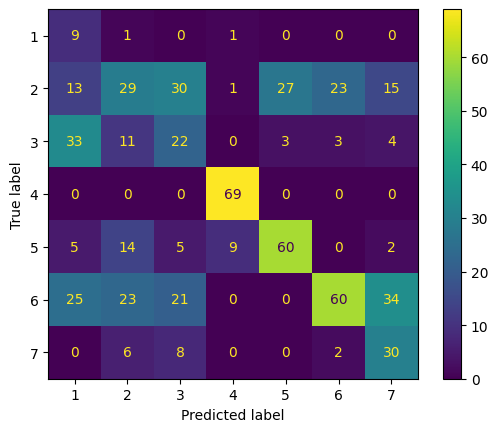

In [12]:
from sklearn import metrics

class_labels = ['1','2','3','4','5','6','7']

def f1_score(predictions, true_labels):

    precision = metrics.precision_score(predictions, true_labels, average=None, zero_division=0)
    recall = metrics.recall_score(predictions, true_labels, average=None, zero_division=0)
    f1 = (1/len(class_labels)) * np.sum(2*(precision * recall)/ (precision + recall))

    print("F1 score: \n", f1)

def generate_confusion_matrix(predictions, true_labels, class_labels): 
    conf_Matrix = metrics.confusion_matrix(predictions, true_labels)
    metrics.ConfusionMatrixDisplay(conf_Matrix,display_labels=class_labels).plot()

f1_score(predictions, test_set['exercise_id'].to_numpy())
generate_confusion_matrix(predictions, test_set['exercise_id'].to_numpy(), class_labels)

### Your code ends here ###

This model shows F1 score of 0.4616 and it is good at identifying exercise 4.

### Data preparations - Standardizing depth camera data

In [13]:
# 2.2

### Your code begins here ###

# acquire depth cam data
training_dc_data = np.array([x.drop(['time'], axis = 1).to_numpy() for x in train_set['df_depth_camera']]) ##need to drop the time axis
testing_dc_data = np.array([x.drop(['time'], axis = 1).to_numpy() for x in test_set['df_depth_camera']])

# standardizing depth camera data
for i in range(training_dc_data.shape[1]):
    testing_dc_data[:,i,:] = (testing_dc_data[:,i,:] - np.mean(training_dc_data[:,i,:],axis=0)) / np.std(training_dc_data[:,i,:],axis=0)
    training_dc_data[:,i,:] = (training_dc_data[:,i,:] - np.mean(training_dc_data[:,i,:],axis=0)) / np.std(training_dc_data[:,i,:],axis=0)


print("Training set after standardization: ")
print(training_dc_data.shape)

print("\nTesting set after standardization: ")
print(testing_dc_data.shape)

### Your code ends here ###

Training set after standardization: 
(1486, 5, 192)

Testing set after standardization: 
(598, 5, 192)


## Dimensionality reduction

### Dimensionality reduction using PCA for depth camera data - dimention 5

In [14]:
dim = 5

pca = PCA(n_components = dim) 

# fit PCA axis-wise
def pca_axis_wise_dc(train, test, dim):
    pca_train = np.empty((train.shape[0], train.shape[1], dim)) #1486, 5, 5
    pca_test = np.empty((test.shape[0], test.shape[1], dim)) #598, 5, 5
    
    for i in range(train.shape[1]):
        pca_train[:,i,:] = pca.fit_transform(train[:,i,:])
        pca_test[:,i,:] = pca.transform(test[:,i,:])
    
    return pca_train, pca_test

pca_train_dc, pca_test_dc = pca_axis_wise_dc(training_dc_data, testing_dc_data, dim)

pca_train_df['df_depth_camera'] = [x.reshape((5,1,5)) for i,x in enumerate(pca_train_dc)]
pca_test_df['df_depth_camera'] = [x.reshape((5,1,5)) for i,x in enumerate(pca_test_dc)]


print("Training set after dimensionality reduction using PCA and reshape: ")
display(pca_train_df['df_depth_camera'][0].shape)
print(pca_train_df['df_depth_camera'][0])
print("\n========================================================================")
print("\nTesting set after dimensionality reduction using PCA and reshape: ")
display(pca_test_df['df_depth_camera'][0].shape)
print(pca_test_df['df_depth_camera'][0])

Training set after dimensionality reduction using PCA and reshape: 


(5, 1, 5)

[[[-2.97334162  2.56499718 -1.83072144  0.3664751   0.30646512]]

 [[-3.11773987 -3.04508817  0.56043191  2.88216672  7.55205924]]

 [[-3.06634383 -3.31403101  0.8786434   3.86608229  5.64884012]]

 [[-3.01604911  2.20940467  1.51048226  0.13263036  0.28184599]]

 [[-2.73131195  9.09872132  3.65632446  2.65039143  0.68779023]]]


Testing set after dimensionality reduction using PCA and reshape: 


(5, 1, 5)

[[[-4.49025591e+00  1.26269770e+00 -2.90670994e-01  1.65620311e+00
    2.53314160e+00]]

 [[-5.06355803e+00 -8.15512717e-01 -9.60181786e-01  3.04259275e+00
    6.62685980e+00]]

 [[-4.75392434e+00  1.23293226e+00  1.31830884e-04  6.71971206e-01
    1.99858705e+00]]

 [[-4.80470388e+00  7.43764846e+00 -3.60872678e+00  2.65244352e+00
    3.28343168e+00]]

 [[-4.74135548e+00  2.82920885e+00  7.05932697e-01  3.45600725e-01
    2.74470263e+00]]]


### Dimensionality reduction using LDA for depth camera data - dimention 5

In [15]:
dim = 5 

lda = LinearDiscriminantAnalysis(n_components = dim) 

def lda_axis_wise_dc(train, test, dim):
    lda_train = np.empty((train.shape[0], train.shape[1], dim)) #1486, 5, 3
    lda_test = np.empty((test.shape[0], test.shape[1], dim)) #598, 5, 3
    
    for i in range(train.shape[1]):
        lda_train[:,i,:] = lda.fit_transform(train[:,i,:], train_set['exercise_id'])
        lda_test[:,i,:] = lda.transform(test[:,i,:])
        
    return lda_train, lda_test

lda_train_dc, lda_test_dc = lda_axis_wise_dc(training_dc_data, testing_dc_data, dim)

lda_train_df['df_depth_camera'] = [x.reshape((5,1,5)) for i,x in enumerate(lda_train_dc)]
lda_test_df['df_depth_camera'] = [x.reshape((5,1,5)) for i,x in enumerate(lda_test_dc)]

print("Training set after dimensionality reduction using LDA and reshape: ")
display(lda_train_df['df_depth_camera'][0].shape)
print(lda_train_df['df_depth_camera'][0])
print("\n========================================================================")
print("\nTesting set after dimensionality reduction using LDA and reshape: ")
display(lda_test_df['df_depth_camera'][0].shape)
print(lda_test_df['df_depth_camera'][0])

Training set after dimensionality reduction using LDA and reshape: 


(5, 1, 5)

[[[-2.87085847 -0.55793268 -1.44904624  0.34163065 -0.96770942]]

 [[-2.95625104  1.10644553 -3.7219096   2.985503    0.96474008]]

 [[-2.44887438  1.88566933 -1.97398147  1.22510177  0.8185776 ]]

 [[-2.12071165 -0.38062864 -0.51550936  0.44090243  0.82753076]]

 [[-2.62047855  1.77503591 -4.0082541   3.33887385 -1.21703588]]]


Testing set after dimensionality reduction using LDA and reshape: 


(5, 1, 5)

[[[-2.98181191  0.82104597 -3.75524561  1.21821821 -0.02749915]]

 [[-4.57084056  0.61423075 -3.78031063 -0.30770863  0.15037447]]

 [[-2.87291227 -1.06366953 -0.23761018  1.55940356  0.35086272]]

 [[-5.99799782 -1.04235707 -3.05216889  2.67924193 -2.4406088 ]]

 [[-4.01935016 -0.20628351 -2.90651819  0.89243891 -0.62170454]]]


### PCA and LDA fusion for depth camera data

In [16]:
# fuse PCA and LDA data to get 5x1x10 shape    
train_combined = np.array([np.dstack([x[0], x[1]]) for i,x in enumerate(zip(pca_train_df['df_depth_camera'], lda_train_df['df_depth_camera']))])
test_combined = np.array([np.dstack([x[0], x[1]]) for i,x in enumerate(zip(pca_test_df['df_depth_camera'], lda_test_df['df_depth_camera']))])


# Fusion of PCA and LDA
def fusion(sample):   
    #compute distances 
    pca_distance = np.sum(np.sum(np.sum(np.square(sample[:,:,0:5] - train_combined[:,:,:,0:5]),axis=2),axis=1), axis = 1)
    lda_distance = np.sum(np.sum(np.sum(np.square(sample[:,:,5:10] - train_combined[:,:,:,5:10]),axis=2),axis=1), axis=1)
    
    #scaling
    pca_distance = (pca_distance - np.min(pca_distance)) / (np.max(pca_distance) - np.min(pca_distance))   
    lda_distance = (lda_distance - np.min(lda_distance)) / (np.max(lda_distance) - np.min(lda_distance))
    
    #fusion
    favg = (1/2) * (pca_distance + lda_distance)
    
    return favg
    
def classification(favg):
    pred = train_set['exercise_id'][np.argmin(favg)]
    return pred

predictions = [classification(fusion(x)) for i,x in enumerate(test_combined)]

test_combined.shape

(598, 5, 1, 10)

### Performance evaluation - PCA and LDA fusion for depth camera data

F1 score: 
 0.5194407172778946


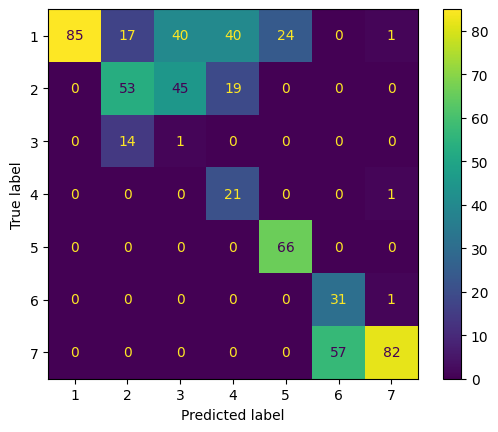

In [17]:
f1_score(predictions, test_set['exercise_id'].to_numpy())
generate_confusion_matrix(predictions, test_set['exercise_id'].to_numpy(), class_labels)

### Your code ends here ###

This model shows F1 score of 0.51944 and it is good at identifying exercise 5. Also, according to the confusion matrix,  exercise 3,4, and 6 have higher performance.

# 3. Feature extraction and feature-level fusion for multimodal classification

<a id='task3'></a>
<div class=" alert alert-warning">
    <b>Assigment.</b> <b>Task 3.</b>

Prepare new feature sets for each modality and combine them to single feature representation. Compare two classifiers from scikit-learn. Train classifiers using joint feature presentation. Evaluate and compare the result using testing dataset. Do the subtasks given as
<br>   
<br> 
<p> <b>3.1</b> Similar to task 2.1, calculate PCA for accelerometer, but choose now the 10 largest principal components as 10-dim feature vector for each window. In addition, for each window calculate mean and standard deviation of each three acc channels as statistical features, resulting 6-dimensional vector. Combine these to 36-dimensional final feature vector.</p>
<br>  
<p> <b>3.2</b> Similar to task 2.2, calculate the PCA for depth images using same setup, but now choose the 10 largest principal components as feature vector. Concatenate the image sequence forming 50-dimensional feature vector from each windowed example.</p>
<br> 
<p> <b>3.3</b> Form a joint feature presentation of features extracted in 3.1 and 3.2, resulting 86-dimensional feature vector for each example. Normalize data between 0-1 using the training dataset. Use support vector machine (SVM) with RBF-kernel and Gaussian naiveBayes classifier (use default parameter values for both classifiers). Train the classifiers and evaluate and compare classifiers on testset using confusion matrices and F1 scores.</p>
<br> 
Document your work, evaluate the results, and analyse the outcomes in each subtasks 3.1-3.3.
    
</div>

### Data preparation

In [19]:
# 3.1
# create seperate copy of prepared data hence the original data might required in later tasks.
### Your code begins here ###
train_set = train_paired_df.copy()
test_set = test_paired_df.copy()
#print(train_set['df_depth_camera'][0])

def PrpareDataForTransformation(df):
    down_sampled_data =[]
    for row in df :
        # droping the column time
        row = row.drop(['time'], axis=1)
        # doing resampling
        row = signal.resample(row, 125)
        down_sampled_data.append(row)
    # perform standarization.    
    prepared_data = Standarizing(np.array(down_sampled_data))
    return prepared_data 

def Standarizing(down_sampled_data):
    # perform standarization x,y,z wise
    down_sampled_data[:,:,0] = (down_sampled_data[:,:,0] - np.mean(down_sampled_data[:,:,0],axis=0)) / np.std(down_sampled_data[:,:,0],axis=0)
    down_sampled_data[:,:,1] = (down_sampled_data[:,:,1] - np.mean(down_sampled_data[:,:,1],axis=0)) / np.std(down_sampled_data[:,:,1],axis=0)
    down_sampled_data[:,:,2] = (down_sampled_data[:,:,2] - np.mean(down_sampled_data[:,:,2],axis=0)) / np.std(down_sampled_data[:,:,2],axis=0)
    return down_sampled_data

# perform resampling standarization
train_acc = PrpareDataForTransformation(train_set['df_acceleration']) #only containing acc data
test_acc = PrpareDataForTransformation(test_set['df_acceleration'])   #only containing acc data

print(train_acc.shape)
print(test_acc.shape)


#Checking data set
#print(train_acc.shape[0])
#print(train_acc.shape[1])
#print(train_acc.shape[2])
#print(len(down_sampled_train_acc[1485]))
#print(down_sampled_train_acc[:,:,1].shape)
#print(train_set['df_depth_camera'][0])
### Your code ends here ###

(1486, 125, 3)
(598, 125, 3)


### PCA modeling on ACC data

In [21]:
#take a copy of resampled and standarized data to perform PCA Modeling
pca_train_acc_data = train_acc.copy()
pca_test_acc_data = test_acc.copy()

components = 10 
pca = PCA(n_components=components)

# data shape is 1486,125,3 7 598,125,3. fit pca with 10 dimensional subspace.
#fit is done through it axis seperately
#final outcome is (1486,10,3), (598,10,3)
def pca_transform_on_acceleration_data(data):
    pca_transform = np.empty((data.shape[0],components,data.shape[2])) #(1486,10,3) -train / (598,10,3)-test
    pca_transform[:,:,0] = pca.fit_transform(data[:,:,0])
    pca_transform[:,:,1] = pca.fit_transform(data[:,:,1])
    pca_transform[:,:,2] = pca.fit_transform(data[:,:,2])
    return pca_transform

pca_train_acc = pca_transform_on_acceleration_data(pca_train_acc_data)
pca_test_acc  = pca_transform_on_acceleration_data(pca_test_acc_data)

print(pca_train_acc.shape)
print(pca_test_acc.shape)

#calculate mean and standard deviation axis wise.
# to get mean_std_vector as 6-dimensional vector reshape is done prior returning.
def Calculate_Mean_Std(data):
    # vector equivalent of data row count * 3* 2 required.
    mean_std_vector = np.empty((data.shape[0], data.shape[2],2)) #(1486,3,2)-train / (598,3,2)-test
    mean_std_vector[:,0,0] = np.mean(data[:,0,:],axis=1) # calculate mean for acc_0
    mean_std_vector[:,1,0] = np.mean(data[:,1,:],axis=1) # calculate mean for acc_1
    mean_std_vector[:,2,0] = np.mean(data[:,2,:],axis=1) # calculate mean for acc_2
    
    mean_std_vector[:,0,1] = np.std(data[:,0,:],axis=1) # calculate std for acc_0
    mean_std_vector[:,1,1] = np.std(data[:,1,:],axis=1) # calculate std for acc_1
    mean_std_vector[:,2,1] = np.std(data[:,2,:],axis=1) # calculate std for acc_2
    mean_std_vector = mean_std_vector.reshape((mean_std_vector.shape[0],-1))
    return mean_std_vector

train_mean_std_vector = Calculate_Mean_Std(train_acc)
test_mean_std_vector = Calculate_Mean_Std(test_acc)
#print(train_mean_std_vector[0])

# need to have 36 dimensional vector. 
#So the combining of pca_train_acc(output of pca) and train_mean_std_vector(output of mean std calculation) is required
combined_meanStd_with_pca_train =zip(pca_train_acc, train_mean_std_vector)
combined_meanStd_with_pca_test = zip(pca_test_acc, test_mean_std_vector)
# print(combined_meanStd_with_pca[0])

def create_feature_vector(combined_meanStd_with_pca):
    final_feature_vector =[]
    for i, row  in enumerate(combined_meanStd_with_pca):
        flattened_row = row[0].flatten(order='F')
        for i in range(1, len(row)):
            flattened_row = np.hstack((flattened_row,row[i]))
        final_feature_vector.append(flattened_row)
    return final_feature_vector

    
train_set['df_acceleration'] = create_feature_vector(combined_meanStd_with_pca_train)
test_set['df_acceleration'] = create_feature_vector(combined_meanStd_with_pca_test)
print(train_set['df_acceleration'][0].shape) 
#print(combined_meanStd_with_pca.shape)
#print(train_set['df_acceleration'][0])
#print(train_set['df_acceleration'][0].shape)


(1486, 10, 3)
(598, 10, 3)
(36,)


3.2

### Prepare DC Data set

In [22]:
def PrpareDataForTransformationOnDcData(df):
    time_excluded_data =[]
    for row in df :
        # droping the column time
        row = row.drop(['time'], axis=1)
        time_excluded_data.append(row)
    prepared_data = StandarizeDcData(np.array(time_excluded_data))
    print(prepared_data.shape)
    return prepared_data

def StandarizeDcData(data):
        # perform standarization.
        data[:,0,:] = (data[:,0,:] - np.mean(data[:,0,:],axis=0)) / np.std(data[:,0,:],axis=0)
        data[:,1,:] = (data[:,1,:] - np.mean(data[:,1,:],axis=0)) / np.std(data[:,1,:],axis=0)
        data[:,2,:] = (data[:,2,:] - np.mean(data[:,2,:],axis=0)) / np.std(data[:,2,:],axis=0)
        data[:,3,:] = (data[:,3,:] - np.mean(data[:,3,:],axis=0)) / np.std(data[:,3,:],axis=0)
        data[:,4,:] = (data[:,4,:] - np.mean(data[:,4,:],axis=0)) / np.std(data[:,4,:],axis=0)
        return data


train_dc = PrpareDataForTransformationOnDcData(train_set['df_depth_camera']) #only containing dc data
test_dc = PrpareDataForTransformationOnDcData(test_set['df_depth_camera'])   #only containing dc data


    

(1486, 5, 192)
(598, 5, 192)


### PCA modeling on DC data

In [23]:
# 3.2

### Your code begins here ###
components = 10
pca = PCA(n_components= components)

def pca_transform_on_dc_data(data):
    pca_dc = np.empty((data.shape[0],data.shape[1],components))
    pca_dc[:,0,:] = pca.fit_transform(data[:,0,:])
    pca_dc[:,1,:] = pca.fit_transform(data[:,1,:])
    pca_dc[:,2,:] = pca.fit_transform(data[:,2,:])
    pca_dc[:,3,:] = pca.fit_transform(data[:,3,:])
    pca_dc[:,4,:] = pca.fit_transform(data[:,4,:])
    return pca_dc


pca_train_dc = pca_transform_on_dc_data(train_dc)
pca_test_dc  = pca_transform_on_dc_data(test_dc)

print(pca_train_dc.shape)
print(pca_test_dc.shape)

train_set['df_depth_camera'] = [x.flatten() for i,x in enumerate(pca_train_dc)]
test_set['df_depth_camera'] = [x.flatten() for i,x in enumerate(pca_test_dc)]


def CreateFeatureVector(pcaDataset, originalset):
    featureVector =[]
    for row in pcaDataset:
        featureVector.append(row.flatten())
    originalset['df_depth_camera'] = featureVector
    return originalset
    
#CreateFeatureVector(pca_train_dc, train_set)
#CreateFeatureVector(pca_test_dc, test_set)        
### Your code ends here ###

(1486, 5, 10)
(598, 5, 10)


### 3.3 - Feature Level Fusion

In [24]:
# 3.3

### Your code begins here ###
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics


#combine each row of acceleration data with depth camera data and created set of tuples
#each tuple contains acceleration data and depth camera data
# index 0 is df_acceleration, index 1 is df_depth_camera
combined_trained_data_set = zip(train_set['df_acceleration'],train_set['df_depth_camera'])
combined_test_data_set = zip(test_set['df_acceleration'],test_set['df_depth_camera'])

# final feature vector for each record should be 86 dimensional
#Hence the above created tuple set is used as input for this metod
# Used hstack to concatenate parts of tuple into one row
def create_final_feature_vector(combined_data_set):
    final_feature_vector =[]
    for i, row  in enumerate(combined_data_set):
        flattened_row = row[0]
        for i in range(1, len(row)):
            flattened_row = np.hstack((flattened_row,row[i]))
        final_feature_vector.append(flattened_row)
    #print(len(final_feature_vector[0]))
    return np.array(final_feature_vector)

prepared_train_set =create_final_feature_vector(combined_trained_data_set)
prepared_test_set =create_final_feature_vector(combined_test_data_set)
#print(prepared_train_set[0])

# method for forming min max standarization for normalization
# Normalization is done using training data set
def min_max_standardization(traindata,testdata):
    testdata = (testdata - np.min(traindata)) /(np.max(traindata) -  np.min(traindata))
    traindata = (traindata - np.min(traindata)) /(np.max(traindata) -  np.min(traindata))
    return traindata,testdata

prepared_train_set, prepared_test_set = min_max_standardization(prepared_train_set, prepared_test_set)

# training the svm classifier
svm_clf = svm.SVC(kernel='rbf')
svm_clf.fit(prepared_train_set, train_set['exercise_id'])
svm_predictions = svm_clf.predict(prepared_test_set)

# training the gaussianNB classifier
gnb_clf = GaussianNB()
gnb_clf.fit(prepared_train_set, train_set['exercise_id'])
gnb_predictions = gnb_clf.predict(prepared_test_set)


### Feature level fusion result analysis

Classification Result for Support Vector Machine
Classification report: 
               precision    recall  f1-score   support

         ex1       0.99      0.49      0.66       171
         ex2       0.44      0.28      0.34       131
         ex3       0.34      0.57      0.42        51
         ex4       0.89      1.00      0.94        71
         ex5       0.00      0.00      0.00        54
         ex6       0.51      1.00      0.68        45
         ex7       0.67      0.76      0.71        75

    accuracy                           0.54       598
   macro avg       0.55      0.59      0.54       598
weighted avg       0.64      0.54      0.55       598

Calculation of metrics changing default properties
╒═══════════════════════╤════════════════════════════════════════════════════════════════════╕
│ Performance Matrice   │ Value                                                              │
╞═══════════════════════╪═══════════════════════════════════════════════════════════════

C:\Users\Sasini\AppData\Local\Programs\Python\Python310\lib\site-packages\tabulate\__init__.py:108: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  or (len(row) >= 2 and row[1] == SEPARATING_LINE)
C:\Users\Sasini\AppData\Local\Programs\Python\Python310\lib\site-packages\tabulate\__init__.py:108: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  or (len(row) >= 2 and row[1] == SEPARATING_LINE)


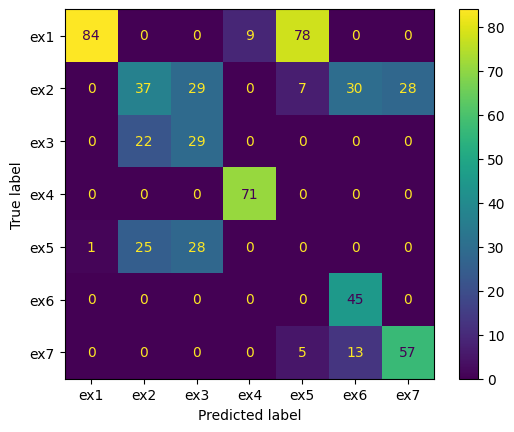

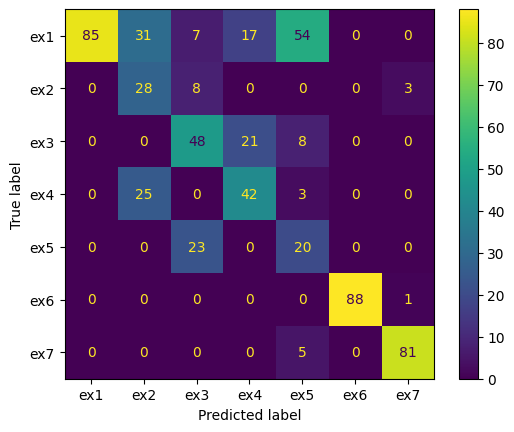

In [31]:
def analysis_of_predicted_results(predicted_label, model):
    actual_label = test_set['exercise_id'].to_numpy()
    class_labels = ['ex1','ex2','ex3','ex4','ex5','ex6', 'ex7']

    print("Classification Result for "+ model )
    print("Classification report: \n", metrics.classification_report(predicted_label, actual_label, target_names=class_labels))
    
    # do the calculations changing default properties.
    print("Calculation of metrics changing default properties")
    precesion = metrics.precision_score(predicted_label, actual_label,average=None, zero_division=0)
    recall = metrics.recall_score(predicted_label, actual_label,average=None, zero_division=0)
    f1_score = metrics.f1_score(predicted_label, actual_label,average='macro', zero_division=0)
    accuracy  = metrics.accuracy_score(predicted_label, actual_label)
    table = [['Performance Matrice', 'Value'], 
            ['precesion', precesion],
            ['recall', recall],
            ['Accuracy', accuracy],
            ['F1 Score',  f1_score],
            ]

    print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

    # Confusion matrix
    confusion_matrix = metrics.confusion_matrix(predicted_label,actual_label)
    metrics.ConfusionMatrixDisplay(confusion_matrix,display_labels=class_labels).plot()
    
analysis_of_predicted_results(svm_predictions, 'Support Vector Machine')
analysis_of_predicted_results(gnb_predictions, 'GaussianNb')

Support vector machine (SVM) with RBF-kernel and Gaussian naiveBayes classifier perform better this time(with 10 dimensional data) than 5 dimensional data. 

Between Support vector machine and Gaussian naive bayes , Gaussian naive Bayes achieved the better result with the nearly 60% of F1_score
Though it is still low, this was achieved by using low resolution images and using only one accolometer. We could achieve better result if we use bigger data set.

# 4. Decision-level fusion for multimodal classification

<a id='task4'></a>
<div class=" alert alert-warning">
    <b>Assigment.</b> <b>Task 4.</b>

Use features calculated for each modality in task 3. Choose base classifier for each modality from scikit-learn. Train classifiers for each modality feature presentations separately and combine the outputs in decision level. Evaluate and compare the result on testing dataset. Do the subtasks given as
<br>
<br> 
<p> <b>4.1</b> Use base classifiers of support vector machine (SVM) with RBF-kernel and AdaBoost classifier (with random_state=0). 
Normalize data between 0-1 using the training dataset. Train the base classifiers by tuning the model parameters (<i>C</i> parameter and RBF-kernel <i>gamma</i> in SVM as well as <i>n_estimators</i> and <i>learning_rate</i> in Adaboost) using 10-fold cross-validation on training dataset to find optimal set of parameters (hint: use GridSearchCV from scikit-learn). For grid search use the following values $C = [0.1, 1.0, 10.0, 100.0]$, $gamma=[0.1, 0.25, 0.5, 0.75, 1.0, 2.0]$, $n\_estimators = [50, 100, 500, 1000]$, and $learning\_rate = [0.1, 0.25, 0.5, 0.75,1.0]$. Choose the best parameters and train the classifiers for each modality on whole training dataset. Is there a possibility that classifiers will overfit to training data using this parameter selection strategy? If so, why? </p>
<br>
<p> <b>4.2</b> Predict probabilistic outputs of each trained classifier for both modalities using the test set. </p>
<br>
<p> <b>4.3</b> Combine the probabilistic outputs of different modalities by fixed classification rules: max, min, prod, and sum. Evaluate, compare, and analyse the final combined results using confusion matrices and F1 scores. Show results for each base classifier combinations (i.e., $SVM_{acc}+SVM_{depth}$, $AdaBoost_{acc}+AdaBoost_{depth}$, $SVM_{acc}+AdaBoost_{depth}$, $AdaBoost_{acc}+SVM_{depth}$)</p>
<br>
Document your work, evaluate the results, and analyse the outcomes in each subtasks 4.1-4.3.
    
</div>

4.1

In [32]:
# 4.1

### Your code begins here ###

# Data preperation
training_acc_desicion_level = [pd.DataFrame(pca_train_acc[:,:,0]), pd.DataFrame(pca_train_acc[:,:,1]), pd.DataFrame(pca_train_acc[:,:,2]), pd.DataFrame(train_mean_std_vector)]
training_acc_desicion_level = pd.concat(training_acc_desicion_level, axis=1, ignore_index=False)

testing_acc_desicion_level = [pd.DataFrame(pca_test_acc[:,:,0]), pd.DataFrame(pca_test_acc[:,:,1]), pd.DataFrame(pca_test_acc[:,:,2]), pd.DataFrame(test_mean_std_vector)]
testing_acc_desicion_level = pd.concat(testing_acc_desicion_level, axis=1, ignore_index=False)

training_dc_desicion_level = [pd.DataFrame(pca_train_dc[:,0,:]), pd.DataFrame(pca_train_dc[:,1,:]), pd.DataFrame(pca_train_dc[:,2,:]),pd.DataFrame(pca_train_dc[:,3,:]), pd.DataFrame(pca_train_dc[:,4,:]) ]
training_dc_desicion_level = pd.concat(training_dc_desicion_level, axis=1, ignore_index=False)

testing_dc_desicion_level = [pd.DataFrame(pca_test_dc[:,0,:]), pd.DataFrame(pca_test_dc[:,1,:]), pd.DataFrame(pca_test_dc[:,2,:]),pd.DataFrame(pca_test_dc[:,3,:]), pd.DataFrame(pca_test_dc[:,4,:]) ]
testing_dc_desicion_level = pd.concat(testing_dc_desicion_level, axis=1, ignore_index=False)

# normalize dataset
training_acc_desicion_level, testing_acc_desicion_level = min_max_standardization(training_acc_desicion_level,testing_acc_desicion_level)

training_dc_desicion_level, testing_dc_desicion_level = min_max_standardization(training_dc_desicion_level,testing_dc_desicion_level)

print(training_acc_desicion_level.shape)
print(training_dc_desicion_level.shape)
print(testing_acc_desicion_level.shape)
print(testing_dc_desicion_level.shape)
#print(training_acc_desicion_level.head())

### Your code ends here ###

(1486, 36)
(1486, 50)
(598, 36)
(598, 50)


C:\Users\Sasini\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\Sasini\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


In [33]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

C = [0.1,1.0,10.0,100.0]
gamma = [0.1,0.25,0.5,0.75,1.0,2.0]
n_estimators = [50,100,500,1000]
learning_rate = [0.1,0.25,0.5,0.75,1.0]

# define model parameters
svm_parameters = {'C':C, 'gamma': gamma}
adaBoost_parameters = {'learning_rate': learning_rate,'n_estimators':n_estimators }

# models
svm_model = svm.SVC(kernel='rbf')
ada_model = AdaBoostClassifier(random_state=0)

#10 fold cross validation on training set to find out optimal parameter set.
svm_clf = GridSearchCV(svm_model, svm_parameters, cv=10)
adaBoost = GridSearchCV(ada_model, adaBoost_parameters, cv=10)

In [ ]:
#Finding out svm best Parameters on acc data
svm_clf.fit(training_acc_desicion_level, train_set['exercise_id'])
svm_best_params_acc = svm_clf.best_params_

#Finding out svm best Parameters on dc data
svm_clf.fit(training_dc_desicion_level, train_set['exercise_id'])
svm_best_params_dc = svm_clf.best_params_

#Finding out adaboost best Parameters on acc data
adaBoost.fit(training_acc_desicion_level, train_set['exercise_id'])
ada_best_params_acc = adaBoost.best_params_

#Finding out adaboost best Parameters on dc data
adaBoost.fit(training_dc_desicion_level, train_set['exercise_id'])
ada_best_params_dc = adaBoost.best_params_

table = [['Modality', 'svm','adaboost'], 
            ['acc', svm_best_params_acc,ada_best_params_acc],
            ['dc', svm_best_params_dc,ada_best_params_dc]
            ]

print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒════════════╤═════════════════════════════╤═══════════════════════════════════════════════╕
│ Modality   │ svm                         │ adaboost                                      │
╞════════════╪═════════════════════════════╪═══════════════════════════════════════════════╡
│ acc        │ {'C': 100.0, 'gamma': 2.0}  │ {'learning_rate': 0.75, 'n_estimators': 1000} │
├────────────┼─────────────────────────────┼───────────────────────────────────────────────┤
│ dc         │ {'C': 100.0, 'gamma': 0.25} │ {'learning_rate': 0.5, 'n_estimators': 500}   │
╘════════════╧═════════════════════════════╧═══════════════════════════════════════════════╛


The GridSearchCV method is used for parameter selection. this function loop through the hyper parameter list and fit out the models and finally it gives the best parameter model which gives the most accurate results.
Here the cross validation also used.

Hence these parameter sets are best parameters for the training set there is a possibility of model overfitting to training set.

4.2

In [ ]:
# 4.2

### Your code begins here ###


#Training SVM with best hyperparameters find out in previous section

#Training svm for acc
svm_best_acc = svm.SVC(kernel='rbf', C=svm_best_params_acc['C'], gamma=svm_best_params_acc['gamma'], probability=True)
svm_best_acc.fit(training_acc_desicion_level, train_set['exercise_id'])

#Training svm for dc
svm_best_dc = svm.SVC(kernel='rbf', C=svm_best_params_dc['C'], gamma=svm_best_params_dc['gamma'], probability=True)
svm_best_dc.fit(training_dc_desicion_level, train_set['exercise_id'])

#predicting svm for acc
svm_pred_acc = svm_best_acc.predict(testing_acc_desicion_level)
svm_probability_acc = svm_best_acc.predict_proba(testing_acc_desicion_level)

#predicting svm for dc
svm_pred_dc = svm_best_dc.predict(testing_dc_desicion_level)
svm_probability_dc = svm_best_dc.predict_proba(testing_dc_desicion_level)

#print(svm_probability_acc)
#print(svm_probability_dc)

#Training adabooster with best hyperparameters find out in previous section

#Training adabooster for acc
adaBoost_best_acc = AdaBoostClassifier(random_state=0, learning_rate=ada_best_params_acc['learning_rate'], n_estimators=ada_best_params_acc['n_estimators'] )
adaBoost_best_acc.fit(training_acc_desicion_level, train_set['exercise_id'])

#Training adabooster for dc
adaBoost_best_dc = AdaBoostClassifier(random_state=0, learning_rate=ada_best_params_dc['learning_rate'], n_estimators=ada_best_params_dc['n_estimators'] )
adaBoost_best_dc.fit(training_dc_desicion_level, train_set['exercise_id'])


#predicting adabooster for acc
adaBoost_pred_acc = adaBoost_best_acc.predict(testing_acc_desicion_level)
adaBoost_probability_acc = adaBoost_best_acc.predict_proba(testing_acc_desicion_level)

#predicting adabooster for dc
adaBoost_pred_dc = adaBoost_best_dc.predict(testing_dc_desicion_level)
adaBoost_probability_dc = adaBoost_best_dc.predict_proba(testing_dc_desicion_level)
#print(adaBoost_probability_acc)
#print(adaBoost_probability_dc)

Result evaluation for befor combining.

Support Vector Machine trained on acc data
F1 Score
0.38070335551218776


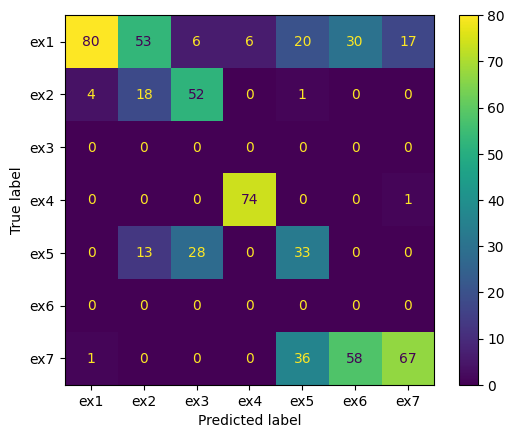

Support Vector Machine trained on dc data
F1 Score
0.3795106118825252


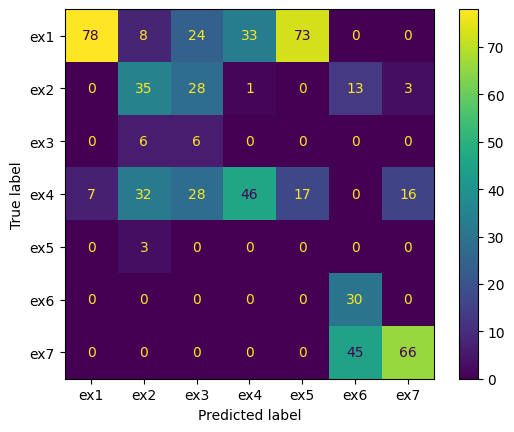

adaboost clasifier trained on acc data
F1 Score
0.5657862596828876


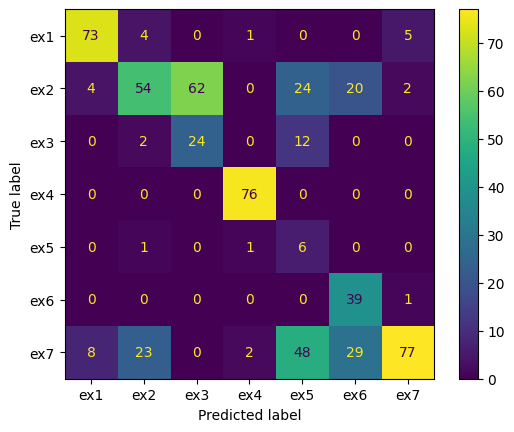

adaboost clasifier trained on dc data
F1 Score
0.24630776595791465


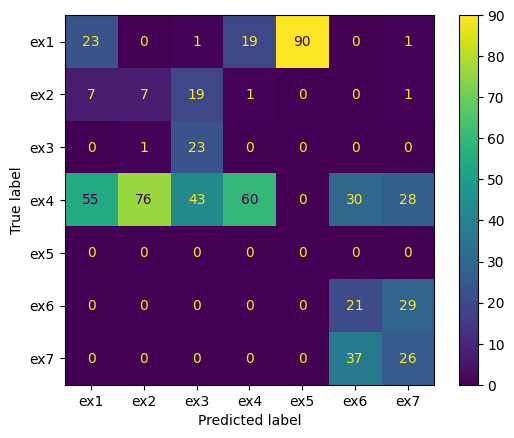

F1 Scores
╒════════════╤══════════╤════════════╕
│ Modality   │      svm │   adaboost │
╞════════════╪══════════╪════════════╡
│ acc        │ 0.380703 │   0.565786 │
├────────────┼──────────┼────────────┤
│ dc         │ 0.379511 │   0.246308 │
╘════════════╧══════════╧════════════╛


In [ ]:
f1score =[]
def evaluate_results(predicted_label, model):
    actual_label = test_set['exercise_id'].to_numpy()
    class_labels = ['ex1','ex2','ex3','ex4','ex5','ex6', 'ex7']
    
     #using macro Calculate metrics for each label, and find their unweighted mean.
    f1_score = metrics.f1_score(predicted_label, actual_label,average='macro')
    f1score.append(f1_score)
    
    # Confusion matrix
    confusion_matrix = metrics.confusion_matrix(predicted_label,actual_label)
    metrics.ConfusionMatrixDisplay(confusion_matrix,display_labels=class_labels).plot()
    print(model)
    print('F1 Score')
    print(f1_score)
    plt.show()

#evaluating results before combining.
evaluate_results(svm_pred_acc, 'Support Vector Machine trained on acc data')
evaluate_results(svm_pred_dc, 'Support Vector Machine trained on dc data')
evaluate_results(adaBoost_pred_acc, 'adaboost clasifier trained on acc data')
evaluate_results(adaBoost_pred_dc, 'adaboost clasifier trained on dc data')

table = [['Modality', 'svm','adaboost'], 
            ['acc', f1score[0],f1score[2]],
            ['dc', f1score[1],f1score[3]]
            ]

print('F1 Scores')
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

4.3

In [ ]:
# 4.3

### Your code begins here ###
svm_acc_svm_dc = np.array((svm_probability_acc, svm_probability_dc))
ada_acc_ada_dc = np.array((adaBoost_probability_acc, adaBoost_probability_dc))
svm_acc_ada_dc = np.array((svm_probability_acc, adaBoost_probability_dc))
ada_acc_svm_dc = np.array((adaBoost_probability_acc, svm_probability_dc))

classification_rules =['max', 'min', 'prod','sum']
label = np.array([1,2,3,4,5,6,7])
def evaluate_descion_fusion_results(data, model):
    predicted_max = label[np.argmax(np.max(data,axis=0),axis=1)]
    predicted_min = label[np.argmax(np.min(data,axis=0),axis=1)]
    predicted_prod = label[np.argmax(np.prod(data,axis=0),axis=1)]
    predicted_sum = label[np.argmax(np.sum(data,axis=0),axis=1)]
    
    for i in range(len(classification_rules)):
        if(classification_rules[i] == 'max'):
            evaluate_results(predicted_max, model)
        elif(classification_rules[i] == 'min'):
            evaluate_results(predicted_min, model)
        elif(classification_rules[i] == 'prod'):
            evaluate_results(predicted_prod, model)
        else:
            evaluate_results(predicted_sum, model)
            
### Your code ends here ###

### Support Vector Machine acc  and Support Vector Machine dc 

Combination of Support Vector Machine acc data and Support Vector Machine dcmodel data
F1 Score
0.3498005617747597


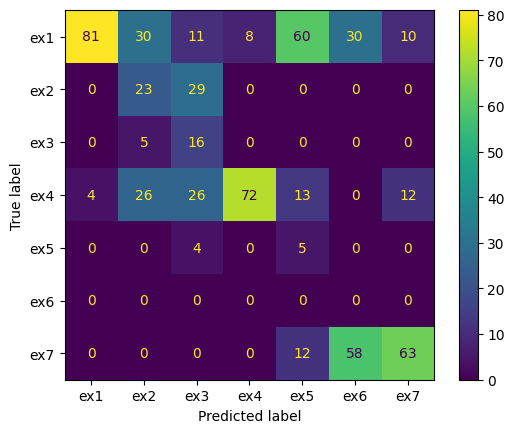

Combination of Support Vector Machine acc data and Support Vector Machine dcmodel data
F1 Score
0.3217735823034329


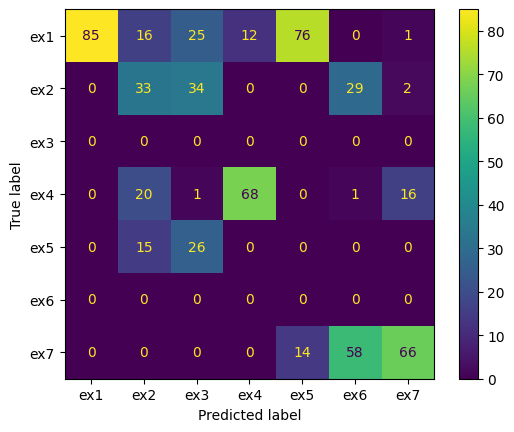

Combination of Support Vector Machine acc data and Support Vector Machine dcmodel data
F1 Score
0.3112290713338291


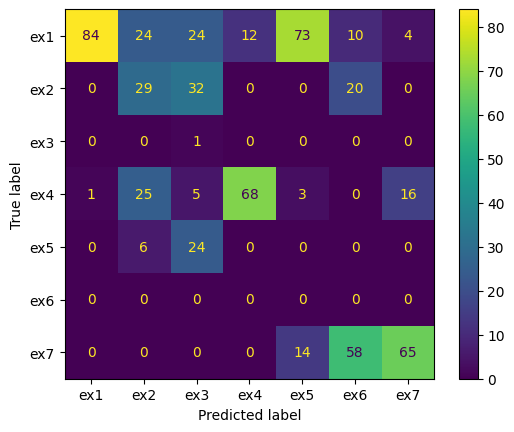

Combination of Support Vector Machine acc data and Support Vector Machine dcmodel data
F1 Score
0.33429227792459887


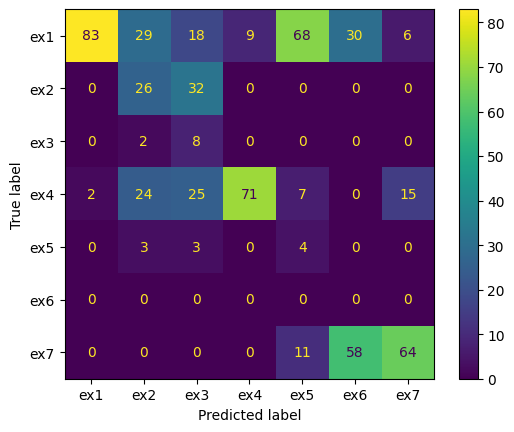

In [ ]:
evaluate_descion_fusion_results(svm_acc_svm_dc, 'Combination of Support Vector Machine acc data and Support Vector Machine dcmodel data')

### Adabooster classifier acc and Adabooster classifier dc

Combination of adabooster classifier acc data and adabooster classifier dc data
F1 Score
0.26904816874736814


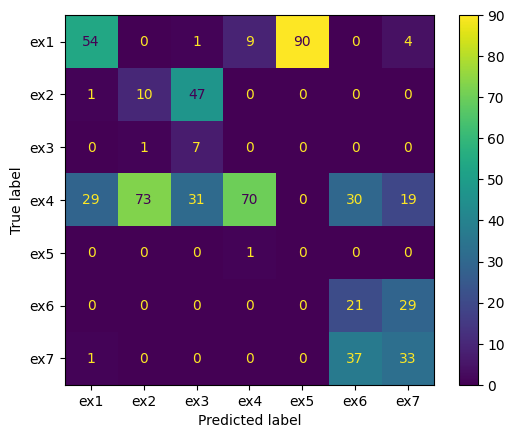

Combination of adabooster classifier acc data and adabooster classifier dc data
F1 Score
0.5908026117006001


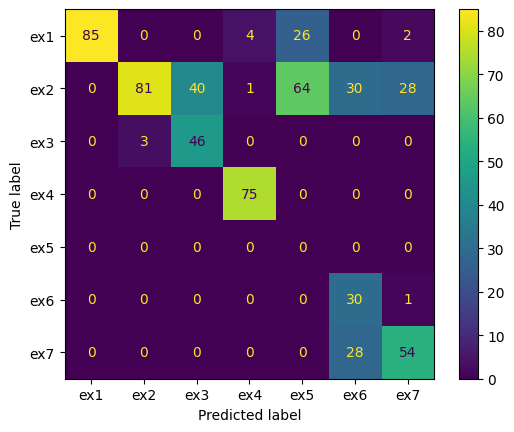

Combination of adabooster classifier acc data and adabooster classifier dc data
F1 Score
0.5684489896095821


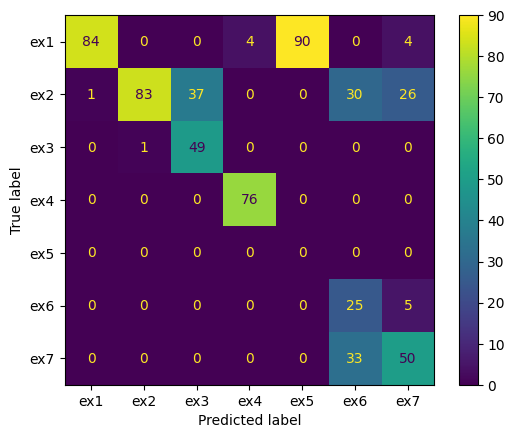

Combination of adabooster classifier acc data and adabooster classifier dc data
F1 Score
0.560883398071384


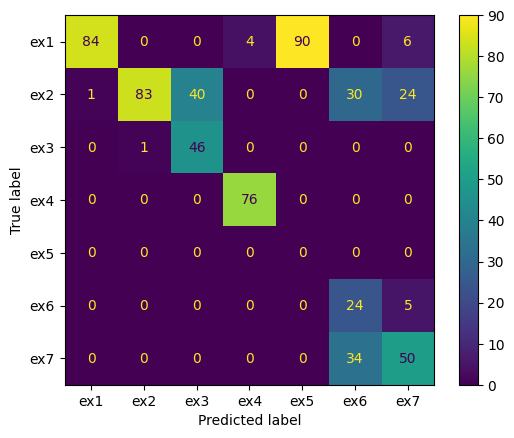

In [ ]:
evaluate_descion_fusion_results(ada_acc_ada_dc, 'Combination of adabooster classifier acc data and adabooster classifier dc data')

### Support Vector Machine accand adabooster classifier dc

Combination of Support Vector Machine acc data and adabooster classifier dc data
F1 Score
0.34950622786289126


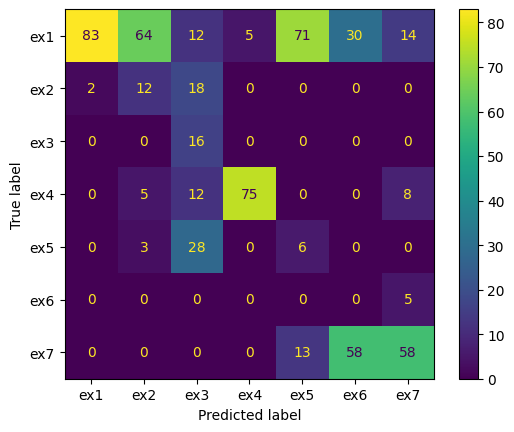

Combination of Support Vector Machine acc data and adabooster classifier dc data
F1 Score
0.3280748903512155


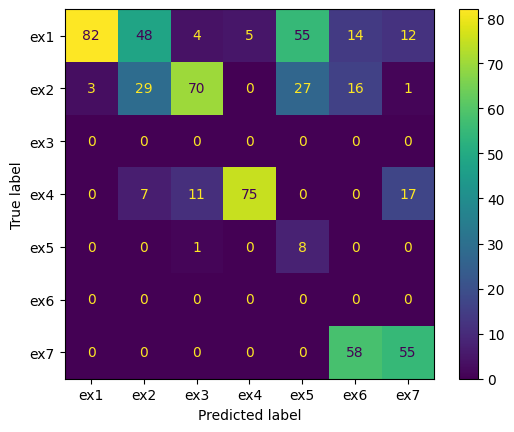

Combination of Support Vector Machine acc data and adabooster classifier dc data
F1 Score
0.2904697893526104


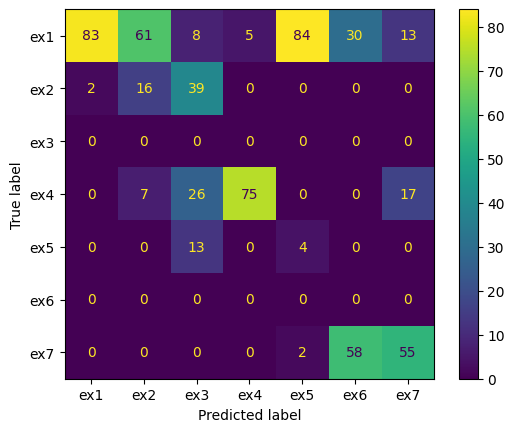

Combination of Support Vector Machine acc data and adabooster classifier dc data
F1 Score
0.2947087238611828


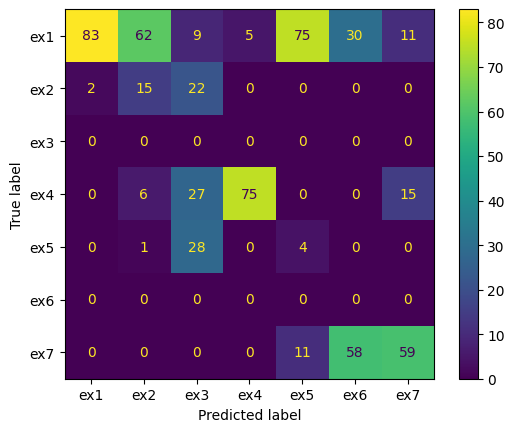

In [ ]:
evaluate_descion_fusion_results(svm_acc_ada_dc, 'Combination of Support Vector Machine acc data and adabooster classifier dc data')

### Adabooster classifier acc and  Support Vector Machine dc

Combination of adabooster classifier acc data and Support Vector Machine dc data
F1 Score
0.39397737355407897


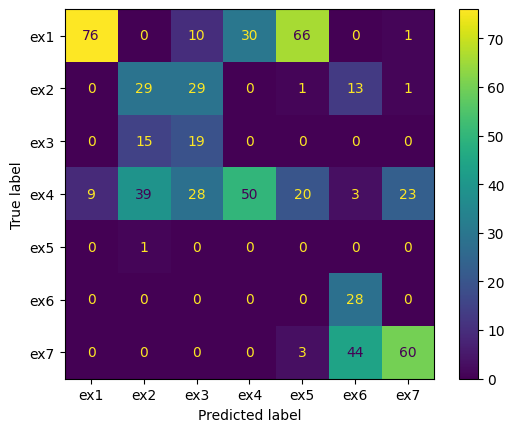

Combination of adabooster classifier acc data and Support Vector Machine dc data
F1 Score
0.49580194602804945


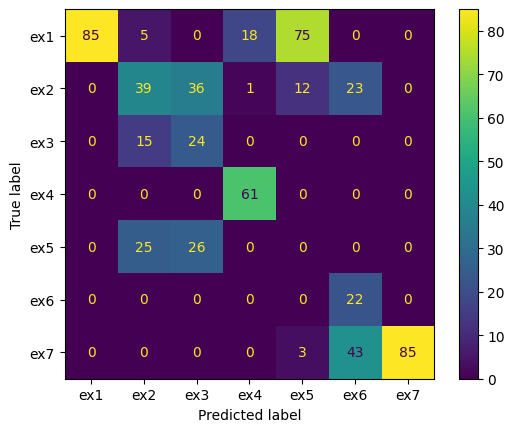

Combination of adabooster classifier acc data and Support Vector Machine dc data
F1 Score
0.4947701080254829


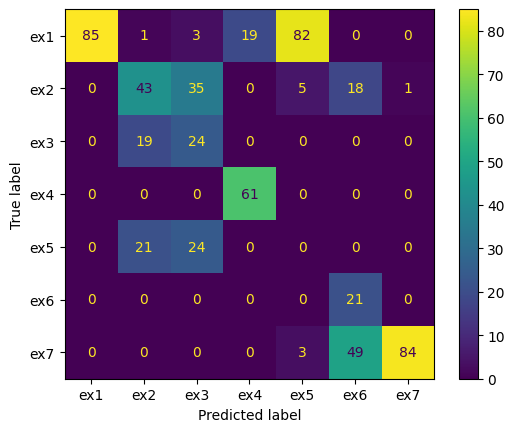

Combination of adabooster classifier acc data and Support Vector Machine dc data
F1 Score
0.43330770948997743


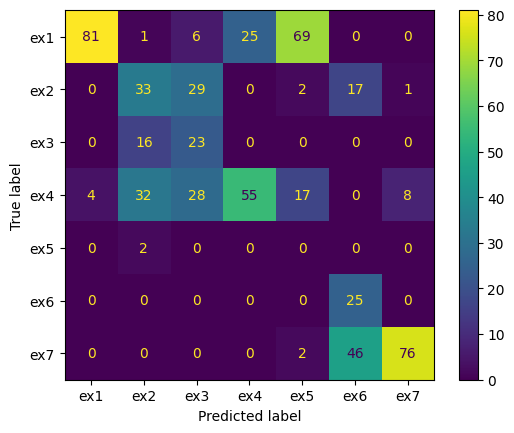

In [ ]:
evaluate_descion_fusion_results(ada_acc_svm_dc, 'Combination of adabooster classifier acc data and Support Vector Machine dc data')


Considering all the combinations the best model is considered as the ada booster acc and ada booster dc when using the minimum rule. It gives F1_score of 0.59.This provides better result in all four rules except max rule compairing to other models.

The lowest performance is gained from the same one when performing on max rule.

Comparing all the performances min rule best among other all three rules in ada ac and ada dc, ada ac, svm dc.

The second best model is the ada ac and svm dc in which also max rule is only the comparatively low.

# 5. Bonus task: Multimodal biometric identification of persons (optional)

<a id='task5'></a>
<div class=" alert alert-warning">
    <b>Assigment.</b> <b>Task 5.</b>

Can you build a classifier that recognizes the person who is performing the exercise? Use same 10 person dataset and split it so that first 25% of each long exercise sequence is used for training and rest 75% of each sequence is used for testing the classifier. Use same 5 second windowing with 3 seconds overlap to prepare the examples. Note that, now the person identity is the class label instead of exercise type. Max. 10 points are given but you can earn points from partial solution, as well.
<br> 
<br> 
<p> <b>5.1</b> Build a classifier to identify persons based on the features and one of the models given in task 4 (max. 5 points).</p>
<br> 
<p> <b>5.2</b> Can you build your own solution (using new features, new classification model or different fusion approaches) to beat the approach in Task 5.1 ? (max. 5 points) </p>
<br>  
Document your work. Evaluate and compare the results using confusion matrix and F1 score.

</div>

### Training and testing set creation

In [ ]:
# 5.1

### Your code begins here ###
data = pd.DataFrame.from_records(records)

# split data into train and test set - first 25% of each long exercise sequence is used to train and 
# remaining 75% of each sequence is used to test the classifier. 

train_set = data.copy() 
test_set = data.copy() 

for index, row in data.iterrows(): 
    train=row['df'].head(round(0.25*len(row['df']))) 
    test=row['df'].drop(train.index) 

    train_set.at[index, "df"] = train
    test_set.at[index, "df"] = test
     
### Your code ends here ###

In [ ]:
# checking the training and testing set data
display(train_set.iloc[0]['df'])
display(test_set.iloc[0]['df'])

,time,acc_0,acc_1,acc_2
0,0.0,-0.515625,-0.843750,-0.131944
1,10.0,-0.515625,-0.853125,-0.134375
2,20.0,-0.515625,-0.850000,-0.140625
3,30.0,-0.515625,-0.862500,-0.150000
4,40.0,-0.525000,-0.856250,-0.156250
...,...,...,...,...
1617,16170.0,-0.359375,-0.295312,0.828125
1618,16180.0,-0.359375,-0.281250,0.826562
1619,16190.0,-0.359375,-0.282986,0.812500
1620,16200.0,-0.359375,-0.293750,0.812500


,time,acc_0,acc_1,acc_2
1622,16220.0,-0.362847,-0.296875,0.812500
1623,16230.0,-0.375000,-0.301563,0.817187
1624,16240.0,-0.375000,-0.317188,0.828125
1625,16250.0,-0.369792,-0.333333,0.822917
1626,16260.0,-0.359375,-0.343750,0.812500
...,...,...,...,...
6483,64830.0,-0.625000,-0.725000,0.296875
6484,64840.0,-0.625000,-0.734375,0.296875
6485,64850.0,-0.625000,-0.726562,0.296875
6486,64860.0,-0.625000,-0.726562,0.289062


### Extracting windows

In [ ]:
# Extract 5-second long windows with 2-second shift (3-second overlap)

def exract_windows(df):
    records_windowed = []

    time_window = 5000.
    time_offset = 2000.

    for row_idx, row_data in df.iterrows():
        df_tmp = row_data["df"]
        time_start = np.min(df_tmp["time"].to_numpy())
        time_end = np.max(df_tmp["time"].to_numpy())

        for window_idx, t0 in enumerate(np.arange(time_start, time_end, time_offset)):
            t1 = t0 + time_window
            # Handle boundary conditions - skip the measurements from the end shorter than window size
            if t1 > time_end:
                continue

            tmp_data = deepcopy(row_data)
            tmp_data["window_idx"] = window_idx
            tmp_data["df"] = df_tmp[(df_tmp["time"] >= t0) &
                                    (df_tmp["time"] < t1)].copy()

            records_windowed.append(tmp_data)

    df_records_windowed = pd.DataFrame.from_records(records_windowed)
    return df_records_windowed


train_window_data = exract_windows(train_set)
test_window_data = exract_windows(test_set)

In [ ]:
print("======================================Train windows============================================================")
print(f"Total windows extracted: {len(train_window_data)}")
print("Dataframe with all windowed records:")
display(train_window_data)
print("Dataframe with one windowed measurement series:")
display(train_window_data["df"].iloc[0])

print("======================================Test windows============================================================")
print(f"Total windows extracted: {len(test_window_data)}")
print("Dataframe with all windowed records:")
display(test_window_data)
print("Dataframe with one windowed measurement series:")
display(test_window_data["df"].iloc[0])

======================================Train windows============================================================
Total windows extracted: 801
Dataframe with all windowed records:


,subject_id,exercise_id,trial,sensor_code,sensor,df,window_idx
0,01,01,1,act,acc,time acc_0 acc_1 acc_2 0 ...,0
1,01,01,1,act,acc,time acc_0 acc_1 acc_2 200 ...,1
2,01,01,1,act,acc,time acc_0 acc_1 acc_2 400 ...,2
3,01,01,1,act,acc,time acc_0 acc_1 acc_2 60...,3
4,01,01,1,act,acc,time acc_0 acc_1 acc_2 80...,4
...,...,...,...,...,...,...,...
796,10,07,1,dc,dc,time dc_0 dc_1 dc_2 dc_3 d...,1
797,10,07,1,dc,dc,time dc_0 dc_1 dc_2 dc_3 d...,2
798,10,07,1,dc,dc,time dc_0 dc_1 dc_2 dc_3 ...,3
799,10,07,1,dc,dc,time dc_0 dc_1 dc_2 dc_3 ...,4


Dataframe with one windowed measurement series:


,time,acc_0,acc_1,acc_2
0,0.0,-0.515625,-0.843750,-0.131944
1,10.0,-0.515625,-0.853125,-0.134375
2,20.0,-0.515625,-0.850000,-0.140625
3,30.0,-0.515625,-0.862500,-0.150000
4,40.0,-0.525000,-0.856250,-0.156250
...,...,...,...,...
495,4950.0,-0.578125,-0.593750,0.515625
496,4960.0,-0.578125,-0.593750,0.509375
497,4970.0,-0.578125,-0.600000,0.500000
498,4980.0,-0.578125,-0.615625,0.493750


======================================Test windows============================================================
Total windows extracted: 3040
Dataframe with all windowed records:


,subject_id,exercise_id,trial,sensor_code,sensor,df,window_idx
0,01,01,1,act,acc,time acc_0 acc_1 acc_2 16...,0
1,01,01,1,act,acc,time acc_0 acc_1 acc_2 18...,1
2,01,01,1,act,acc,time acc_0 acc_1 acc_2 20...,2
3,01,01,1,act,acc,time acc_0 acc_1 acc_2 22...,3
4,01,01,1,act,acc,time acc_0 acc_1 acc_2 24...,4
...,...,...,...,...,...,...,...
3035,10,07,1,dc,dc,time dc_0 dc_1 dc_2 dc_3 ...,17
3036,10,07,1,dc,dc,time dc_0 dc_1 dc_2 dc_3 ...,18
3037,10,07,1,dc,dc,time dc_0 dc_1 dc_2 dc_3 ...,19
3038,10,07,1,dc,dc,time dc_0 dc_1 dc_2 dc_3 ...,20


Dataframe with one windowed measurement series:


,time,acc_0,acc_1,acc_2
1622,16220.0,-0.362847,-0.296875,0.812500
1623,16230.0,-0.375000,-0.301563,0.817187
1624,16240.0,-0.375000,-0.317188,0.828125
1625,16250.0,-0.369792,-0.333333,0.822917
1626,16260.0,-0.359375,-0.343750,0.812500
...,...,...,...,...
2117,21170.0,-0.593750,-0.656250,0.368750
2118,21180.0,-0.598437,-0.656250,0.385937
2119,21190.0,-0.604167,-0.656250,0.375000
2120,21200.0,-0.587500,-0.656250,0.375000


### Summary of final training and testing sets

In [ ]:
training_df = train_window_data.copy() 
testing_df = test_window_data.copy()

train_paired_df = MergeDataByPairs(training_df)
test_paired_df  = MergeDataByPairs(testing_df)

display(train_paired_df.head())

#number of examples, dimensions of each example
table = [['Data Set', 'Data Rows', 'Data Columns',  'Shape of Data Set'], 
         ['Training Data Set',len(train_paired_df), len(train_paired_df.columns), train_paired_df.shape],
         ['Testing Data Set',len(test_paired_df), len(test_paired_df.columns), test_paired_df.shape]
        ]

print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))
print("Column names for both sets - " + ', '.join(list(train_paired_df.columns)))


,subject_id,exercise_id,trial,df_acceleration,window_idx,df_depth_camera
0,01,01,1,time acc_0 acc_1 acc_2 0 ...,0,time dc_0 dc_1 dc_2 dc_3 d...
1,01,01,1,time acc_0 acc_1 acc_2 200 ...,1,time dc_0 dc_1 dc_2 dc_3 d...
2,01,01,1,time acc_0 acc_1 acc_2 400 ...,2,time dc_0 dc_1 dc_2 dc_3 d...
3,01,01,1,time acc_0 acc_1 acc_2 60...,3,time dc_0 dc_1 dc_2 dc_3 ...
4,01,01,1,time acc_0 acc_1 acc_2 80...,4,time dc_0 dc_1 dc_2 dc_3 ...


╒═══════════════════╤═════════════╤════════════════╤═════════════════════╕
│ Data Set          │   Data Rows │   Data Columns │ Shape of Data Set   │
╞═══════════════════╪═════════════╪════════════════╪═════════════════════╡
│ Training Data Set │         397 │              6 │ (397, 6)            │
├───────────────────┼─────────────┼────────────────┼─────────────────────┤
│ Testing Data Set  │        1518 │              6 │ (1518, 6)           │
╘═══════════════════╧═════════════╧════════════════╧═════════════════════╛
Column names for both sets - subject_id, exercise_id, trial, df_acceleration, window_idx, df_depth_camera


In [ ]:
# 5.2

### Your code begins here ###

### Your code ends here ###